Installing (updating) the following libraries for your Sagemaker
instance.

In [ ]:
!pip install .. # installing d2l


# Image Augmentation
:label:`sec_image_augmentation`

In :numref:`sec_alexnet`, 
we mentioned that large datasets 
are a prerequisite
for the success of
deep neural networks
in various applications.
*Image augmentation* 
generates similar but distinct training examples
after a series of random changes to the training images, thereby expanding the size of the training set.
Alternatively,
image augmentation can be motivated
by the fact that 
random tweaks of training examples 
allow models to rely less on
certain attributes, thereby improving their generalization ability.
For example, we can crop an image in different ways to make the object of interest appear in different positions, thereby reducing the dependence of a model on the position of the object. 
We can also adjust factors such as brightness and color to reduce a model's sensitivity to color.
It is probably true
that image augmentation was indispensable
for the success of AlexNet at that time.
In this section we will discuss this widely used technique in computer vision.


In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

## Common Image Augmentation Methods

In our investigation of common image augmentation methods, we will use the following $400\times 500$ image an example.


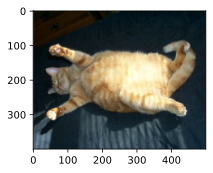

In [2]:
d2l.set_figsize()
img = d2l.Image.open('../img/cat1.jpg')
d2l.plt.imshow(img);

Most image augmentation methods have a certain degree of randomness. To make it easier for us to observe the effect of image augmentation, next we define an auxiliary function `apply`. This function runs the image augmentation method `aug` multiple times on the input image `img` and shows all the results.


In [3]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

### Flipping and Cropping


[**Flipping the image left and right**] usually does not change the category of the object. 
This is one of the earliest and most widely used methods of image augmentation.
Next, we use the `transforms` module to create the `RandomHorizontalFlip` instance, which flips
an image left and right with a 50% chance.


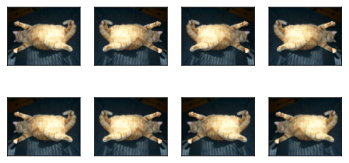

In [4]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

[**Flipping up and down**] is not as common as flipping left and right. But at least for this example image, flipping up and down does not hinder recognition.
Next, we create a `RandomVerticalFlip` instance to flip
an image up and down with a 50% chance.


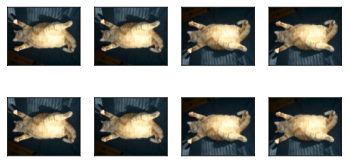

In [5]:
apply(img, torchvision.transforms.RandomVerticalFlip())

In the example image we used, the cat is in the middle of the image, but this may not be the case in general. 
In :numref:`sec_pooling`, we explained that the pooling layer can reduce the sensitivity of a convolutional layer to the target position.
In addition, we can also randomly crop the image to make objects appear in different positions in the image at different scales, which can also reduce the sensitivity of a model to the target position.

In the code below, we [**randomly crop**] an area with an area of $10\% \sim 100\%$ of the original area each time, and the ratio of width to height of this area is randomly selected from $0.5 \sim 2$. Then, the width and height of the region are both scaled to 200 pixels. 
Unless otherwise specified, the random number between $a$ and $b$ in this section refers to a continuous value obtained by random and uniform sampling from the interval $[a, b]$.


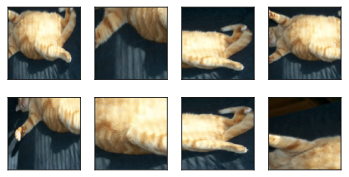

In [6]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

### Changing Colors

Another augmentation method is changing colors. We can change four aspects of the image color: brightness, contrast, saturation, and hue. In the example below, we [**randomly change the brightness**] of the image to a value between 50% ($1-0.5$) and 150% ($1+0.5$) of the original image.


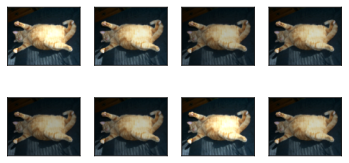

In [7]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

Similarly, we can [**randomly change the hue**] of the image.


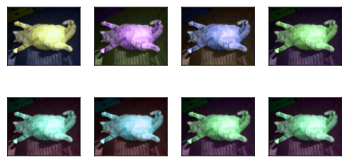

In [8]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

We can also create a `RandomColorJitter` instance and set how to [**randomly change the `brightness`, `contrast`, `saturation`, and `hue` of the image at the same time**].


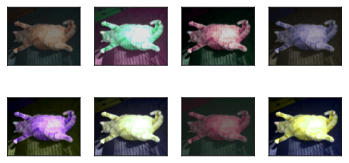

In [9]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

### Combining Multiple Image Augmentation Methods

In practice, we will [**combine multiple image augmentation methods**]. 
For example,
we can combine the different image augmentation methods defined above and apply them to each image via a `Compose` instance.


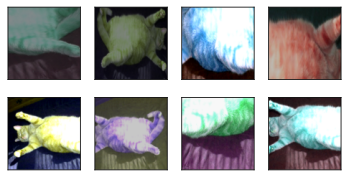

In [10]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

## [**Training with Image Augmentation**]

Let's train a model with image augmentation.
Here we use the CIFAR-10 dataset instead of the Fashion-MNIST dataset that we used before. 
This is because the position and size of the objects in the Fashion-MNIST dataset have been normalized, while the color and size of the objects in the CIFAR-10 dataset have more significant differences. 
The first 32 training images in the CIFAR-10 dataset are shown below.


  0%|          | 0/170498071 [00:00<?, ?it/s]

  0%|          | 65536/170498071 [00:00<06:00, 472866.74it/s]

  0%|          | 229376/170498071 [00:00<03:15, 870685.04it/s]

  0%|          | 688128/170498071 [00:00<01:31, 1853199.01it/s]

  1%|          | 1998848/170498071 [00:00<00:32, 5161804.29it/s]

  2%|▏         | 2686976/170498071 [00:00<00:29, 5671079.96it/s]

  2%|▏         | 3506176/170498071 [00:00<00:28, 5850359.56it/s]

  3%|▎         | 4390912/170498071 [00:00<00:24, 6682822.97it/s]

  3%|▎         | 5111808/170498071 [00:00<00:25, 6530887.66it/s]

  3%|▎         | 5963776/170498071 [00:01<00:23, 7066723.41it/s]

  4%|▍         | 6717440/170498071 [00:01<00:23, 6936596.20it/s]

  4%|▍         | 7536640/170498071 [00:01<00:22, 7244843.06it/s]

  5%|▍         | 8290304/170498071 [00:01<00:22, 7229749.01it/s]

  5%|▌         | 9142272/170498071 [00:01<00:21, 7567579.92it/s]

  6%|▌         | 9961472/170498071 [00:01<00:21, 7484227.68it/s]

  6%|▋         | 10846208/170498071 [00:01<00:20, 7830251.22it/s]

  7%|▋         | 11698176/170498071 [00:01<00:20, 7752312.94it/s]

  7%|▋         | 12582912/170498071 [00:01<00:19, 8008682.91it/s]

  8%|▊         | 13467648/170498071 [00:02<00:19, 7970326.55it/s]

  8%|▊         | 14352384/170498071 [00:02<00:19, 8187736.88it/s]

  9%|▉         | 15237120/170498071 [00:02<00:19, 8100633.42it/s]

  9%|▉         | 16154624/170498071 [00:02<00:18, 8312996.59it/s]

 10%|█         | 17072128/170498071 [00:02<00:18, 8261616.59it/s]

 11%|█         | 17924096/170498071 [00:02<00:21, 7035008.38it/s]

 11%|█         | 19136512/170498071 [00:02<00:18, 7970522.92it/s]

 12%|█▏        | 19988480/170498071 [00:02<00:19, 7604263.70it/s]

 12%|█▏        | 20774912/170498071 [00:03<00:21, 7052780.53it/s]

 13%|█▎        | 21528576/170498071 [00:03<00:21, 6792880.61it/s]

 13%|█▎        | 22249472/170498071 [00:03<00:21, 6840802.22it/s]

 13%|█▎        | 22970368/170498071 [00:03<00:22, 6582864.73it/s]

 14%|█▍        | 23658496/170498071 [00:03<00:25, 5759127.46it/s]

 14%|█▍        | 24477696/170498071 [00:03<00:23, 6269109.20it/s]

 15%|█▍        | 25133056/170498071 [00:03<00:25, 5742676.16it/s]

 15%|█▌        | 25755648/170498071 [00:03<00:26, 5459424.59it/s]

 15%|█▌        | 26345472/170498071 [00:04<00:27, 5306489.12it/s]

 16%|█▌        | 26902528/170498071 [00:04<00:34, 4113536.33it/s]

 16%|█▋        | 27721728/170498071 [00:04<00:29, 4910194.34it/s]

 17%|█▋        | 28278784/170498071 [00:04<00:32, 4437774.62it/s]

 17%|█▋        | 28770304/170498071 [00:04<00:34, 4158052.26it/s]

 17%|█▋        | 29229056/170498071 [00:04<00:35, 4034397.82it/s]

 17%|█▋        | 29655040/170498071 [00:04<00:36, 3912172.00it/s]

 18%|█▊        | 30081024/170498071 [00:05<00:36, 3855129.17it/s]

 18%|█▊        | 30474240/170498071 [00:05<00:36, 3826091.72it/s]

 18%|█▊        | 30867456/170498071 [00:05<00:36, 3820480.23it/s]

 18%|█▊        | 31260672/170498071 [00:05<00:36, 3791866.34it/s]

 19%|█▊        | 31653888/170498071 [00:05<00:36, 3819128.77it/s]

 19%|█▉        | 32047104/170498071 [00:05<00:45, 3013797.00it/s]

 19%|█▉        | 32702464/170498071 [00:05<00:36, 3810554.62it/s]

 19%|█▉        | 33128448/170498071 [00:05<00:40, 3427301.18it/s]

 20%|█▉        | 33521664/170498071 [00:06<00:42, 3249504.64it/s]

 20%|█▉        | 33882112/170498071 [00:06<00:43, 3125673.23it/s]

 20%|██        | 34209792/170498071 [00:06<00:44, 3059968.91it/s]

 20%|██        | 34537472/170498071 [00:06<00:55, 2471655.33it/s]

 21%|██        | 34996224/170498071 [00:06<00:46, 2917636.34it/s]

 21%|██        | 35323904/170498071 [00:06<00:51, 2633264.61it/s]

 21%|██        | 35618816/170498071 [00:06<00:54, 2495655.48it/s]

 21%|██        | 35913728/170498071 [00:07<00:55, 2418195.07it/s]

 21%|██        | 36175872/170498071 [00:07<00:56, 2391562.45it/s]

 21%|██▏       | 36438016/170498071 [00:07<00:57, 2348077.90it/s]

 22%|██▏       | 36700160/170498071 [00:07<00:56, 2354723.44it/s]

 22%|██▏       | 36962304/170498071 [00:07<00:57, 2324062.76it/s]

 22%|██▏       | 37224448/170498071 [00:07<00:58, 2282333.39it/s]

 22%|██▏       | 37519360/170498071 [00:07<00:55, 2381502.49it/s]

 22%|██▏       | 37781504/170498071 [00:07<00:55, 2370302.24it/s]

 22%|██▏       | 38043648/170498071 [00:07<00:55, 2393219.82it/s]

 22%|██▏       | 38305792/170498071 [00:08<00:55, 2382494.55it/s]

 23%|██▎       | 38567936/170498071 [00:08<00:55, 2389377.23it/s]

 23%|██▎       | 38830080/170498071 [00:08<01:06, 1993918.16it/s]

 23%|██▎       | 39157760/170498071 [00:08<00:57, 2266087.21it/s]

 23%|██▎       | 39419904/170498071 [00:08<01:02, 2099192.96it/s]

 23%|██▎       | 39649280/170498071 [00:08<01:05, 2001413.82it/s]

 23%|██▎       | 39878656/170498071 [00:08<01:06, 1976620.33it/s]

 24%|██▎       | 40108032/170498071 [00:08<01:08, 1892388.52it/s]

 24%|██▎       | 40304640/170498071 [00:09<01:17, 1689018.82it/s]

 24%|██▍       | 40501248/170498071 [00:09<01:21, 1594214.09it/s]

 24%|██▍       | 40665088/170498071 [00:09<01:25, 1522850.47it/s]

 24%|██▍       | 40828928/170498071 [00:09<01:26, 1491788.05it/s]

 24%|██▍       | 40992768/170498071 [00:09<01:28, 1469412.49it/s]

 24%|██▍       | 41156608/170498071 [00:09<01:27, 1475776.85it/s]

 24%|██▍       | 41320448/170498071 [00:09<01:27, 1474176.39it/s]

 24%|██▍       | 41484288/170498071 [00:09<01:26, 1492029.07it/s]

 24%|██▍       | 41648128/170498071 [00:10<01:28, 1457640.46it/s]

 25%|██▍       | 41811968/170498071 [00:10<01:25, 1503382.59it/s]

 25%|██▍       | 41975808/170498071 [00:10<01:24, 1515422.53it/s]

 25%|██▍       | 42139648/170498071 [00:10<01:24, 1510358.70it/s]

 25%|██▍       | 42303488/170498071 [00:10<01:23, 1535867.08it/s]

 25%|██▍       | 42467328/170498071 [00:10<01:23, 1527956.27it/s]

 25%|██▌       | 42631168/170498071 [00:10<01:23, 1538780.15it/s]

 25%|██▌       | 42795008/170498071 [00:10<01:23, 1536258.82it/s]

 25%|██▌       | 42958848/170498071 [00:10<01:22, 1543426.67it/s]

 25%|██▌       | 43122688/170498071 [00:11<01:22, 1548954.55it/s]

 25%|██▌       | 43286528/170498071 [00:11<01:21, 1557900.40it/s]

 25%|██▌       | 43450368/170498071 [00:11<01:21, 1562957.52it/s]

 26%|██▌       | 43614208/170498071 [00:11<01:20, 1578445.09it/s]

 26%|██▌       | 43778048/170498071 [00:11<01:19, 1594477.48it/s]

 26%|██▌       | 43974656/170498071 [00:11<01:18, 1621035.31it/s]

 26%|██▌       | 44171264/170498071 [00:11<01:17, 1640023.97it/s]

 26%|██▌       | 44367872/170498071 [00:11<01:17, 1637919.11it/s]

 26%|██▌       | 44564480/170498071 [00:11<01:16, 1642957.91it/s]

 26%|██▋       | 44761088/170498071 [00:12<01:14, 1685078.14it/s]

 26%|██▋       | 44957696/170498071 [00:12<01:13, 1698202.63it/s]

 26%|██▋       | 45154304/170498071 [00:12<01:13, 1716079.90it/s]

 27%|██▋       | 45350912/170498071 [00:12<01:12, 1722037.53it/s]

 27%|██▋       | 45547520/170498071 [00:12<01:12, 1720033.76it/s]

 27%|██▋       | 45744128/170498071 [00:12<01:12, 1721750.33it/s]

 27%|██▋       | 45940736/170498071 [00:12<01:17, 1617175.58it/s]

 27%|██▋       | 46104576/170498071 [00:12<01:24, 1474535.95it/s]

 27%|██▋       | 46268416/170498071 [00:12<01:24, 1478139.81it/s]

 27%|██▋       | 46432256/170498071 [00:13<01:25, 1458749.82it/s]

 27%|██▋       | 46596096/170498071 [00:13<01:25, 1455620.90it/s]

 27%|██▋       | 46759936/170498071 [00:13<01:26, 1425360.44it/s]

 28%|██▊       | 46923776/170498071 [00:13<01:24, 1459271.53it/s]

 28%|██▊       | 47087616/170498071 [00:13<01:23, 1479877.93it/s]

 28%|██▊       | 47251456/170498071 [00:13<01:21, 1509561.86it/s]

 28%|██▊       | 47415296/170498071 [00:13<01:22, 1500202.18it/s]

 28%|██▊       | 47611904/170498071 [00:13<01:17, 1591463.19it/s]

 28%|██▊       | 47775744/170498071 [00:13<01:17, 1577280.15it/s]

 28%|██▊       | 47972352/170498071 [00:14<01:14, 1644002.11it/s]

 28%|██▊       | 48168960/170498071 [00:14<01:21, 1507386.31it/s]

 28%|██▊       | 48365568/170498071 [00:14<01:20, 1519957.80it/s]

 28%|██▊       | 48529408/170498071 [00:14<01:25, 1430712.16it/s]

 29%|██▊       | 48693248/170498071 [00:14<01:28, 1383340.18it/s]

 29%|██▊       | 48857088/170498071 [00:14<01:32, 1319820.00it/s]

 29%|██▉       | 49020928/170498071 [00:14<01:30, 1344037.41it/s]

 29%|██▉       | 49184768/170498071 [00:14<01:34, 1286171.25it/s]

 29%|██▉       | 49315840/170498071 [00:15<01:43, 1171302.78it/s]

 29%|██▉       | 49446912/170498071 [00:15<01:47, 1125425.62it/s]

 29%|██▉       | 49577984/170498071 [00:15<01:53, 1064712.15it/s]

 29%|██▉       | 49709056/170498071 [00:15<01:53, 1063219.77it/s]

 29%|██▉       | 49840128/170498071 [00:15<02:00, 1000469.34it/s]

 29%|██▉       | 49971200/170498071 [00:15<02:16, 883291.59it/s] 

 29%|██▉       | 50069504/170498071 [00:15<02:18, 866817.09it/s]

 29%|██▉       | 50167808/170498071 [00:16<02:23, 839508.34it/s]

 29%|██▉       | 50266112/170498071 [00:16<02:23, 835827.42it/s]

 30%|██▉       | 50364416/170498071 [00:16<02:28, 808840.81it/s]

 30%|██▉       | 50462720/170498071 [00:16<02:26, 819182.28it/s]

 30%|██▉       | 50561024/170498071 [00:16<02:25, 825366.16it/s]

 30%|██▉       | 50659328/170498071 [00:16<02:26, 816692.04it/s]

 30%|██▉       | 50757632/170498071 [00:16<02:25, 820839.52it/s]

 30%|██▉       | 50855936/170498071 [00:16<02:20, 851921.58it/s]

 30%|██▉       | 50954240/170498071 [00:17<02:55, 679495.41it/s]

 30%|██▉       | 51118080/170498071 [00:17<02:23, 833348.03it/s]

 30%|███       | 51216384/170498071 [00:17<02:31, 784951.51it/s]

 30%|███       | 51314688/170498071 [00:17<02:37, 759083.25it/s]

 30%|███       | 51412992/170498071 [00:17<02:39, 747640.38it/s]

 30%|███       | 51511296/170498071 [00:17<02:34, 768229.05it/s]

 30%|███       | 51609600/170498071 [00:17<02:38, 748150.65it/s]

 30%|███       | 51707904/170498071 [00:18<02:29, 797164.26it/s]

 30%|███       | 51806208/170498071 [00:18<02:32, 778006.20it/s]

 30%|███       | 51904512/170498071 [00:18<02:29, 791821.27it/s]

 31%|███       | 52002816/170498071 [00:18<02:21, 838127.61it/s]

 31%|███       | 52101120/170498071 [00:18<02:45, 716996.45it/s]

 31%|███       | 52199424/170498071 [00:18<02:33, 771146.52it/s]

 31%|███       | 52297728/170498071 [00:18<02:51, 691084.71it/s]

 31%|███       | 52396032/170498071 [00:19<02:51, 687483.23it/s]

 31%|███       | 52494336/170498071 [00:19<02:51, 688976.23it/s]

 31%|███       | 52592640/170498071 [00:19<02:51, 688783.96it/s]

 31%|███       | 52690944/170498071 [00:19<02:50, 690709.55it/s]

 31%|███       | 52789248/170498071 [00:19<02:49, 693274.28it/s]

 31%|███       | 52887552/170498071 [00:19<02:49, 695156.81it/s]

 31%|███       | 52985856/170498071 [00:19<02:42, 722125.25it/s]

 31%|███       | 53084160/170498071 [00:20<02:39, 737673.73it/s]

 31%|███       | 53182464/170498071 [00:20<03:08, 622532.00it/s]

 31%|███▏      | 53313536/170498071 [00:20<02:45, 708400.57it/s]

 31%|███▏      | 53411840/170498071 [00:20<02:50, 685922.97it/s]

 31%|███▏      | 53510144/170498071 [00:20<02:50, 685413.14it/s]

 31%|███▏      | 53608448/170498071 [00:20<02:58, 656023.98it/s]

 31%|███▏      | 53706752/170498071 [00:20<02:55, 666289.22it/s]

 32%|███▏      | 53805056/170498071 [00:21<02:44, 708020.63it/s]

 32%|███▏      | 53903360/170498071 [00:21<02:46, 701948.89it/s]

 32%|███▏      | 54001664/170498071 [00:21<02:45, 705386.93it/s]

 32%|███▏      | 54099968/170498071 [00:21<02:45, 704776.18it/s]

 32%|███▏      | 54198272/170498071 [00:21<02:45, 701297.01it/s]

 32%|███▏      | 54296576/170498071 [00:21<02:32, 759922.34it/s]

 32%|███▏      | 54394880/170498071 [00:21<02:29, 775059.65it/s]

 32%|███▏      | 54493184/170498071 [00:22<02:33, 754435.16it/s]

 32%|███▏      | 54591488/170498071 [00:22<02:34, 748716.83it/s]

 32%|███▏      | 54689792/170498071 [00:22<02:25, 793677.94it/s]

 32%|███▏      | 54788096/170498071 [00:22<02:23, 808020.63it/s]

 32%|███▏      | 54886400/170498071 [00:22<02:16, 848138.16it/s]

 32%|███▏      | 54984704/170498071 [00:22<02:15, 853072.06it/s]

 32%|███▏      | 55083008/170498071 [00:22<02:21, 817664.19it/s]

 32%|███▏      | 55214080/170498071 [00:22<02:14, 854510.55it/s]

 32%|███▏      | 55345152/170498071 [00:23<02:11, 876209.92it/s]

 33%|███▎      | 55476224/170498071 [00:23<02:08, 893338.77it/s]

 33%|███▎      | 55607296/170498071 [00:23<01:57, 981687.87it/s]

 33%|███▎      | 55738368/170498071 [00:23<01:58, 966658.48it/s]

 33%|███▎      | 55836672/170498071 [00:23<02:01, 945865.18it/s]

 33%|███▎      | 55967744/170498071 [00:23<01:51, 1027269.72it/s]

 33%|███▎      | 56098816/170498071 [00:23<01:55, 994409.87it/s] 

 33%|███▎      | 56229888/170498071 [00:23<02:00, 945659.53it/s]

 33%|███▎      | 56328192/170498071 [00:24<02:01, 941452.38it/s]

 33%|███▎      | 56426496/170498071 [00:24<02:01, 938221.49it/s]

 33%|███▎      | 56524800/170498071 [00:24<02:10, 875899.08it/s]

 33%|███▎      | 56623104/170498071 [00:24<02:10, 870405.59it/s]

 33%|███▎      | 56721408/170498071 [00:24<02:08, 882124.29it/s]

 33%|███▎      | 56819712/170498071 [00:24<02:08, 886063.59it/s]

 33%|███▎      | 56950784/170498071 [00:24<02:05, 903220.55it/s]

 33%|███▎      | 57081856/170498071 [00:24<02:04, 912100.00it/s]

 34%|███▎      | 57212928/170498071 [00:24<02:03, 919862.08it/s]

 34%|███▎      | 57344000/170498071 [00:25<02:01, 932478.55it/s]

 34%|███▎      | 57475072/170498071 [00:25<01:53, 995573.12it/s]

 34%|███▍      | 57606144/170498071 [00:25<01:54, 985156.52it/s]

 34%|███▍      | 57737216/170498071 [00:25<01:56, 968002.63it/s]

 34%|███▍      | 57868288/170498071 [00:25<01:51, 1007399.11it/s]

 34%|███▍      | 57999360/170498071 [00:25<01:52, 996749.57it/s] 

 34%|███▍      | 58130432/170498071 [00:25<01:47, 1040461.55it/s]

 34%|███▍      | 58261504/170498071 [00:26<01:48, 1032415.54it/s]

 34%|███▍      | 58392576/170498071 [00:26<01:46, 1050569.65it/s]

 34%|███▍      | 58523648/170498071 [00:26<01:48, 1027527.94it/s]

 34%|███▍      | 58654720/170498071 [00:26<01:43, 1085846.23it/s]

 34%|███▍      | 58785792/170498071 [00:26<01:42, 1093898.44it/s]

 35%|███▍      | 58916864/170498071 [00:26<01:45, 1054314.08it/s]

 35%|███▍      | 59047936/170498071 [00:26<01:58, 939572.52it/s] 

 35%|███▍      | 59146240/170498071 [00:26<01:59, 933318.35it/s]

 35%|███▍      | 59244544/170498071 [00:27<01:59, 930680.62it/s]

 35%|███▍      | 59342848/170498071 [00:27<02:01, 916987.09it/s]

 35%|███▍      | 59441152/170498071 [00:27<02:00, 920170.87it/s]

 35%|███▍      | 59539456/170498071 [00:27<02:00, 923047.05it/s]

 35%|███▍      | 59637760/170498071 [00:27<01:59, 929006.94it/s]

 35%|███▌      | 59736064/170498071 [00:27<01:57, 938906.20it/s]

 35%|███▌      | 59867136/170498071 [00:27<01:50, 999812.60it/s]

 35%|███▌      | 59998208/170498071 [00:27<01:52, 983199.90it/s]

 35%|███▌      | 60129280/170498071 [00:27<01:47, 1028560.36it/s]

 35%|███▌      | 60260352/170498071 [00:28<01:47, 1026428.57it/s]

 35%|███▌      | 60391424/170498071 [00:28<01:44, 1050751.02it/s]

 35%|███▌      | 60522496/170498071 [00:28<01:47, 1021733.51it/s]

 36%|███▌      | 60653568/170498071 [00:28<01:40, 1092941.63it/s]

 36%|███▌      | 60784640/170498071 [00:28<01:45, 1041337.97it/s]

 36%|███▌      | 60915712/170498071 [00:28<01:43, 1062963.40it/s]

 36%|███▌      | 61079552/170498071 [00:28<01:40, 1093875.09it/s]

 36%|███▌      | 61210624/170498071 [00:29<02:01, 898530.43it/s] 

 36%|███▌      | 61407232/170498071 [00:29<01:40, 1088332.94it/s]

 36%|███▌      | 61538304/170498071 [00:29<01:51, 975566.97it/s] 

 36%|███▌      | 61669376/170498071 [00:29<01:53, 959362.25it/s]

 36%|███▌      | 61800448/170498071 [00:29<01:59, 908805.03it/s]

 36%|███▋      | 61931520/170498071 [00:29<01:55, 938988.07it/s]

 36%|███▋      | 62029824/170498071 [00:29<01:56, 930818.56it/s]

 36%|███▋      | 62128128/170498071 [00:29<01:56, 933788.04it/s]

 37%|███▋      | 62259200/170498071 [00:30<01:55, 939635.50it/s]

 37%|███▋      | 62390272/170498071 [00:30<01:49, 990213.13it/s]

 37%|███▋      | 62521344/170498071 [00:30<01:50, 974960.31it/s]

 37%|███▋      | 62652416/170498071 [00:30<01:43, 1037463.32it/s]

 37%|███▋      | 62783488/170498071 [00:30<01:47, 1005176.51it/s]

 37%|███▋      | 62914560/170498071 [00:30<01:44, 1028184.67it/s]

 37%|███▋      | 63045632/170498071 [00:30<01:42, 1048454.10it/s]

 37%|███▋      | 63176704/170498071 [00:30<01:43, 1037704.04it/s]

 37%|███▋      | 63307776/170498071 [00:31<01:40, 1061384.90it/s]

 37%|███▋      | 63438848/170498071 [00:31<01:37, 1100598.84it/s]

 37%|███▋      | 63569920/170498071 [00:31<01:41, 1056840.91it/s]

 37%|███▋      | 63700992/170498071 [00:31<01:38, 1078802.97it/s]

 37%|███▋      | 63832064/170498071 [00:31<01:37, 1096815.65it/s]

 38%|███▊      | 63963136/170498071 [00:31<01:39, 1066249.71it/s]

 38%|███▊      | 64094208/170498071 [00:31<01:35, 1116929.54it/s]

 38%|███▊      | 64225280/170498071 [00:31<01:45, 1011774.13it/s]

 38%|███▊      | 64356352/170498071 [00:32<01:42, 1031236.08it/s]

 38%|███▊      | 64487424/170498071 [00:32<01:47, 984094.60it/s] 

 38%|███▊      | 64618496/170498071 [00:32<01:53, 930378.10it/s]

 38%|███▊      | 64749568/170498071 [00:32<01:52, 936054.86it/s]

 38%|███▊      | 64880640/170498071 [00:32<01:50, 951773.37it/s]

 38%|███▊      | 64978944/170498071 [00:32<01:50, 951111.17it/s]

 38%|███▊      | 65110016/170498071 [00:32<01:47, 984029.15it/s]

 38%|███▊      | 65241088/170498071 [00:32<01:45, 1001098.63it/s]

 38%|███▊      | 65372160/170498071 [00:33<01:41, 1038886.73it/s]

 38%|███▊      | 65503232/170498071 [00:33<01:41, 1030952.76it/s]

 38%|███▊      | 65634304/170498071 [00:33<01:41, 1031288.43it/s]

 39%|███▊      | 65765376/170498071 [00:33<01:35, 1091265.12it/s]

 39%|███▊      | 65896448/170498071 [00:33<01:36, 1079095.14it/s]

 39%|███▊      | 66027520/170498071 [00:33<01:35, 1099255.32it/s]

 39%|███▉      | 66158592/170498071 [00:33<01:32, 1122478.49it/s]

 39%|███▉      | 66289664/170498071 [00:33<01:35, 1088403.15it/s]

 39%|███▉      | 66420736/170498071 [00:34<01:31, 1134919.16it/s]

 39%|███▉      | 66551808/170498071 [00:34<01:30, 1148083.29it/s]

 39%|███▉      | 66682880/170498071 [00:34<01:32, 1122158.62it/s]

 39%|███▉      | 66813952/170498071 [00:34<01:29, 1164435.73it/s]

 39%|███▉      | 66945024/170498071 [00:34<01:32, 1123331.40it/s]

 39%|███▉      | 67108864/170498071 [00:34<01:28, 1169805.64it/s]

 39%|███▉      | 67239936/170498071 [00:34<01:26, 1190848.73it/s]

 40%|███▉      | 67371008/170498071 [00:34<01:29, 1148121.91it/s]

 40%|███▉      | 67534848/170498071 [00:35<01:26, 1194274.11it/s]

 40%|███▉      | 67665920/170498071 [00:35<01:24, 1212682.56it/s]

 40%|███▉      | 67829760/170498071 [00:35<01:23, 1235097.94it/s]

 40%|███▉      | 67960832/170498071 [00:35<01:23, 1235188.39it/s]

 40%|███▉      | 68091904/170498071 [00:35<01:22, 1235625.28it/s]

 40%|████      | 68255744/170498071 [00:35<01:18, 1294662.43it/s]

 40%|████      | 68386816/170498071 [00:35<01:21, 1253548.62it/s]

 40%|████      | 68550656/170498071 [00:35<01:20, 1267019.85it/s]

 40%|████      | 68714496/170498071 [00:35<01:17, 1316281.55it/s]

 40%|████      | 68878336/170498071 [00:36<01:17, 1316998.51it/s]

 40%|████      | 69042176/170498071 [00:36<01:18, 1284450.54it/s]

 41%|████      | 69206016/170498071 [00:36<01:14, 1366167.09it/s]

 41%|████      | 69369856/170498071 [00:36<01:15, 1334682.33it/s]

 41%|████      | 69533696/170498071 [00:36<01:11, 1410986.41it/s]

 41%|████      | 69697536/170498071 [00:36<01:13, 1370853.10it/s]

 41%|████      | 69861376/170498071 [00:36<01:09, 1438223.31it/s]

 41%|████      | 70025216/170498071 [00:36<01:11, 1407061.88it/s]

 41%|████      | 70189056/170498071 [00:36<01:10, 1416316.04it/s]

 41%|████▏     | 70352896/170498071 [00:37<01:09, 1443837.08it/s]

 41%|████▏     | 70516736/170498071 [00:37<01:08, 1453584.91it/s]

 41%|████▏     | 70680576/170498071 [00:37<01:07, 1482470.72it/s]

 42%|████▏     | 70877184/170498071 [00:37<01:06, 1493883.58it/s]

 42%|████▏     | 71041024/170498071 [00:37<01:04, 1531207.74it/s]

 42%|████▏     | 71204864/170498071 [00:37<01:04, 1530998.54it/s]

 42%|████▏     | 71368704/170498071 [00:37<01:04, 1543281.93it/s]

 42%|████▏     | 71532544/170498071 [00:37<01:17, 1284777.32it/s]

 42%|████▏     | 71761920/170498071 [00:38<01:04, 1527637.13it/s]

 42%|████▏     | 71925760/170498071 [00:38<01:09, 1415266.76it/s]

 42%|████▏     | 72089600/170498071 [00:38<01:13, 1347818.67it/s]

 42%|████▏     | 72253440/170498071 [00:38<01:13, 1345479.81it/s]

 42%|████▏     | 72417280/170498071 [00:38<01:14, 1311276.14it/s]

 43%|████▎     | 72581120/170498071 [00:38<01:13, 1326476.07it/s]

 43%|████▎     | 72744960/170498071 [00:38<01:14, 1308497.64it/s]

 43%|████▎     | 72908800/170498071 [00:38<01:10, 1380984.03it/s]

 43%|████▎     | 73072640/170498071 [00:39<01:10, 1379217.35it/s]

 43%|████▎     | 73236480/170498071 [00:39<01:11, 1355669.20it/s]

 43%|████▎     | 73400320/170498071 [00:39<01:17, 1246900.27it/s]

 43%|████▎     | 73531392/170498071 [00:39<01:27, 1108333.30it/s]

 43%|████▎     | 73662464/170498071 [00:39<01:35, 1011539.24it/s]

 43%|████▎     | 73793536/170498071 [00:39<01:47, 902779.03it/s] 

 43%|████▎     | 73891840/170498071 [00:39<01:47, 898693.27it/s]

 43%|████▎     | 73990144/170498071 [00:40<01:46, 903688.25it/s]

 43%|████▎     | 74088448/170498071 [00:40<01:53, 846998.65it/s]

 44%|████▎     | 74186752/170498071 [00:40<01:52, 856758.85it/s]

 44%|████▎     | 74285056/170498071 [00:40<01:49, 881690.30it/s]

 44%|████▎     | 74383360/170498071 [00:40<01:49, 876382.57it/s]

 44%|████▎     | 74481664/170498071 [00:40<01:50, 866808.04it/s]

 44%|████▎     | 74579968/170498071 [00:40<01:51, 858447.06it/s]

 44%|████▍     | 74711040/170498071 [00:40<01:43, 922594.69it/s]

 44%|████▍     | 74809344/170498071 [00:41<02:05, 759754.26it/s]

 44%|████▍     | 74973184/170498071 [00:41<01:48, 878587.07it/s]

 44%|████▍     | 75071488/170498071 [00:41<01:51, 858657.49it/s]

 44%|████▍     | 75169792/170498071 [00:41<02:03, 774562.76it/s]

 44%|████▍     | 75268096/170498071 [00:41<02:01, 784858.71it/s]

 44%|████▍     | 75366400/170498071 [00:41<01:56, 817179.18it/s]

 44%|████▍     | 75464704/170498071 [00:41<01:58, 801222.55it/s]

 44%|████▍     | 75563008/170498071 [00:41<01:57, 806263.22it/s]

 44%|████▍     | 75694080/170498071 [00:42<01:52, 843365.05it/s]

 44%|████▍     | 75792384/170498071 [00:42<01:51, 846214.34it/s]

 45%|████▍     | 75890688/170498071 [00:42<01:52, 844281.92it/s]

 45%|████▍     | 75988992/170498071 [00:42<02:11, 721018.50it/s]

 45%|████▍     | 76120064/170498071 [00:42<01:53, 834686.14it/s]

 45%|████▍     | 76218368/170498071 [00:42<01:59, 789989.21it/s]

 45%|████▍     | 76316672/170498071 [00:42<02:03, 759568.30it/s]

 45%|████▍     | 76414976/170498071 [00:43<02:07, 739159.87it/s]

 45%|████▍     | 76513280/170498071 [00:43<02:10, 722831.87it/s]

 45%|████▍     | 76611584/170498071 [00:43<02:11, 714002.74it/s]

 45%|████▍     | 76709888/170498071 [00:43<02:07, 733005.97it/s]

 45%|████▌     | 76808192/170498071 [00:43<02:09, 720703.56it/s]

 45%|████▌     | 76906496/170498071 [00:43<02:07, 736168.45it/s]

 45%|████▌     | 77004800/170498071 [00:43<02:05, 743438.50it/s]

 45%|████▌     | 77103104/170498071 [00:43<02:00, 775284.52it/s]

 45%|████▌     | 77201408/170498071 [00:44<02:00, 774345.39it/s]

 45%|████▌     | 77299712/170498071 [00:44<01:57, 793338.52it/s]

 45%|████▌     | 77430784/170498071 [00:44<01:52, 824513.94it/s]

 45%|████▌     | 77529088/170498071 [00:44<01:48, 856342.89it/s]

 46%|████▌     | 77627392/170498071 [00:44<01:47, 865665.49it/s]

 46%|████▌     | 77725696/170498071 [00:44<01:43, 894856.86it/s]

 46%|████▌     | 77824000/170498071 [00:44<01:49, 843752.14it/s]

 46%|████▌     | 77955072/170498071 [00:44<01:41, 911603.56it/s]

 46%|████▌     | 78086144/170498071 [00:45<01:39, 930180.61it/s]

 46%|████▌     | 78217216/170498071 [00:45<02:01, 759234.39it/s]

 46%|████▌     | 78413824/170498071 [00:45<01:38, 930244.21it/s]

 46%|████▌     | 78544896/170498071 [00:45<01:46, 865590.85it/s]

 46%|████▌     | 78643200/170498071 [00:45<01:46, 863388.68it/s]

 46%|████▌     | 78741504/170498071 [00:45<01:50, 827220.79it/s]

 46%|████▌     | 78839808/170498071 [00:46<01:58, 772657.81it/s]

 46%|████▋     | 78938112/170498071 [00:46<02:12, 689034.11it/s]

 46%|████▋     | 79036416/170498071 [00:46<02:17, 666440.65it/s]

 46%|████▋     | 79134720/170498071 [00:46<02:16, 671422.69it/s]

 46%|████▋     | 79233024/170498071 [00:46<02:16, 670207.38it/s]

 47%|████▋     | 79331328/170498071 [00:46<02:14, 675754.90it/s]

 47%|████▋     | 79429632/170498071 [00:46<02:13, 681969.92it/s]

 47%|████▋     | 79527936/170498071 [00:47<02:13, 681977.23it/s]

 47%|████▋     | 79626240/170498071 [00:47<02:11, 689622.58it/s]

 47%|████▋     | 79724544/170498071 [00:47<02:09, 702250.19it/s]

 47%|████▋     | 79822848/170498071 [00:47<02:03, 732134.35it/s]

 47%|████▋     | 79921152/170498071 [00:47<02:02, 736916.92it/s]

 47%|████▋     | 80019456/170498071 [00:47<02:22, 635954.88it/s]

 47%|████▋     | 80150528/170498071 [00:47<01:58, 761510.51it/s]

 47%|████▋     | 80248832/170498071 [00:48<02:03, 728529.47it/s]

 47%|████▋     | 80347136/170498071 [00:48<02:05, 717450.20it/s]

 47%|████▋     | 80445440/170498071 [00:48<02:06, 710895.46it/s]

 47%|████▋     | 80543744/170498071 [00:48<02:07, 705479.11it/s]

 47%|████▋     | 80642048/170498071 [00:48<02:08, 701106.74it/s]

 47%|████▋     | 80740352/170498071 [00:48<02:06, 707467.52it/s]

 47%|████▋     | 80838656/170498071 [00:48<02:07, 703535.15it/s]

 47%|████▋     | 80936960/170498071 [00:49<02:07, 703182.42it/s]

 48%|████▊     | 81035264/170498071 [00:49<01:59, 746322.66it/s]

 48%|████▊     | 81133568/170498071 [00:49<01:53, 790310.68it/s]

 48%|████▊     | 81231872/170498071 [00:49<01:56, 769205.06it/s]

 48%|████▊     | 81330176/170498071 [00:49<01:59, 747646.08it/s]

 48%|████▊     | 81428480/170498071 [00:49<01:53, 781986.56it/s]

 48%|████▊     | 81526784/170498071 [00:49<01:47, 828116.39it/s]

 48%|████▊     | 81625088/170498071 [00:49<01:53, 785704.39it/s]

 48%|████▊     | 81723392/170498071 [00:50<01:49, 811765.22it/s]

 48%|████▊     | 81821696/170498071 [00:50<01:44, 846887.83it/s]

 48%|████▊     | 81920000/170498071 [00:50<01:49, 807278.01it/s]

 48%|████▊     | 82051072/170498071 [00:50<01:44, 848068.15it/s]

 48%|████▊     | 82182144/170498071 [00:50<01:35, 929390.40it/s]

 48%|████▊     | 82280448/170498071 [00:50<01:34, 928841.06it/s]

 48%|████▊     | 82378752/170498071 [00:50<01:34, 930815.14it/s]

 48%|████▊     | 82477056/170498071 [00:50<01:34, 933047.15it/s]

 48%|████▊     | 82608128/170498071 [00:50<01:34, 928345.25it/s]

 49%|████▊     | 82706432/170498071 [00:51<01:49, 799756.23it/s]

 49%|████▊     | 82837504/170498071 [00:51<01:37, 901785.08it/s]

 49%|████▊     | 82935808/170498071 [00:51<01:38, 891387.37it/s]

 49%|████▊     | 83034112/170498071 [00:51<01:45, 828278.26it/s]

 49%|████▉     | 83132416/170498071 [00:51<01:44, 838818.38it/s]

 49%|████▉     | 83230720/170498071 [00:51<01:46, 818209.17it/s]

 49%|████▉     | 83329024/170498071 [00:51<01:44, 833835.85it/s]

 49%|████▉     | 83427328/170498071 [00:51<01:41, 856782.84it/s]

 49%|████▉     | 83525632/170498071 [00:52<01:38, 881530.02it/s]

 49%|████▉     | 83623936/170498071 [00:52<01:38, 880813.67it/s]

 49%|████▉     | 83722240/170498071 [00:52<01:35, 904469.74it/s]

 49%|████▉     | 83820544/170498071 [00:52<01:33, 924718.51it/s]

 49%|████▉     | 83951616/170498071 [00:52<01:32, 931371.82it/s]

 49%|████▉     | 84082688/170498071 [00:52<01:32, 931310.23it/s]

 49%|████▉     | 84213760/170498071 [00:52<01:26, 991968.59it/s]

 49%|████▉     | 84344832/170498071 [00:52<01:28, 969467.35it/s]

 50%|████▉     | 84443136/170498071 [00:53<01:29, 963346.13it/s]

 50%|████▉     | 84574208/170498071 [00:53<01:23, 1022920.20it/s]

 50%|████▉     | 84705280/170498071 [00:53<01:26, 995299.92it/s] 

 50%|████▉     | 84836352/170498071 [00:53<01:24, 1017113.99it/s]

 50%|████▉     | 84967424/170498071 [00:53<01:25, 1003294.25it/s]

 50%|████▉     | 85098496/170498071 [00:53<01:25, 1002730.79it/s]

 50%|████▉     | 85229568/170498071 [00:53<01:21, 1052039.61it/s]

 50%|█████     | 85360640/170498071 [00:53<01:20, 1053819.56it/s]

 50%|█████     | 85491712/170498071 [00:54<01:19, 1067999.65it/s]

 50%|█████     | 85622784/170498071 [00:54<01:17, 1091650.72it/s]

 50%|█████     | 85753856/170498071 [00:54<01:16, 1101611.40it/s]

 50%|█████     | 85884928/170498071 [00:54<01:16, 1100251.68it/s]

 50%|█████     | 86016000/170498071 [00:54<01:13, 1145357.36it/s]

 51%|█████     | 86147072/170498071 [00:54<01:12, 1155592.78it/s]

 51%|█████     | 86278144/170498071 [00:54<01:11, 1173078.60it/s]

 51%|█████     | 86409216/170498071 [00:54<01:10, 1194630.58it/s]

 51%|█████     | 86540288/170498071 [00:54<01:09, 1202139.57it/s]

 51%|█████     | 86671360/170498071 [00:54<01:08, 1219484.34it/s]

 51%|█████     | 86802432/170498071 [00:55<01:07, 1243018.27it/s]

 51%|█████     | 86933504/170498071 [00:55<01:22, 1016493.34it/s]

 51%|█████     | 87130112/170498071 [00:55<01:09, 1201018.54it/s]

 51%|█████     | 87261184/170498071 [00:55<01:14, 1122232.82it/s]

 51%|█████▏    | 87392256/170498071 [00:55<01:16, 1092865.87it/s]

 51%|█████▏    | 87523328/170498071 [00:55<01:19, 1044606.26it/s]

 51%|█████▏    | 87654400/170498071 [00:55<01:18, 1061113.41it/s]

 51%|█████▏    | 87785472/170498071 [00:56<01:20, 1022761.41it/s]

 52%|█████▏    | 87949312/170498071 [00:56<01:18, 1055849.30it/s]

 52%|█████▏    | 88080384/170498071 [00:56<01:18, 1051707.87it/s]

 52%|█████▏    | 88211456/170498071 [00:56<01:19, 1036207.67it/s]

 52%|█████▏    | 88342528/170498071 [00:56<01:27, 941737.13it/s] 

 52%|█████▏    | 88440832/170498071 [00:56<01:28, 928087.87it/s]

 52%|█████▏    | 88539136/170498071 [00:56<01:29, 916145.81it/s]

 52%|█████▏    | 88637440/170498071 [00:56<01:35, 861202.48it/s]

 52%|█████▏    | 88735744/170498071 [00:57<01:43, 791418.44it/s]

 52%|█████▏    | 88834048/170498071 [00:57<01:50, 739171.46it/s]

 52%|█████▏    | 88932352/170498071 [00:57<01:55, 703597.66it/s]

 52%|█████▏    | 89030656/170498071 [00:57<01:56, 696393.52it/s]

 52%|█████▏    | 89128960/170498071 [00:57<01:57, 691488.56it/s]

 52%|█████▏    | 89227264/170498071 [00:57<01:57, 694341.79it/s]

 52%|█████▏    | 89325568/170498071 [00:58<01:51, 729926.65it/s]

 52%|█████▏    | 89423872/170498071 [00:58<01:48, 744489.24it/s]

 53%|█████▎    | 89522176/170498071 [00:58<01:50, 731809.02it/s]

 53%|█████▎    | 89620480/170498071 [00:58<01:45, 765303.93it/s]

 53%|█████▎    | 89718784/170498071 [00:58<01:43, 778154.64it/s]

 53%|█████▎    | 89817088/170498071 [00:58<01:42, 785001.65it/s]

 53%|█████▎    | 89915392/170498071 [00:58<01:45, 762065.45it/s]

 53%|█████▎    | 90046464/170498071 [00:58<01:39, 811404.15it/s]

 53%|█████▎    | 90144768/170498071 [00:59<01:36, 829536.14it/s]

 53%|█████▎    | 90243072/170498071 [00:59<01:33, 860410.72it/s]

 53%|█████▎    | 90341376/170498071 [00:59<01:31, 876427.15it/s]

 53%|█████▎    | 90439680/170498071 [00:59<01:29, 895276.86it/s]

 53%|█████▎    | 90537984/170498071 [00:59<01:29, 897053.96it/s]

 53%|█████▎    | 90636288/170498071 [00:59<01:27, 909385.44it/s]

 53%|█████▎    | 90767360/170498071 [00:59<01:21, 978700.55it/s]

 53%|█████▎    | 90865664/170498071 [00:59<01:25, 933602.12it/s]

 53%|█████▎    | 90996736/170498071 [00:59<01:21, 973259.17it/s]

 53%|█████▎    | 91127808/170498071 [01:00<01:16, 1034865.42it/s]

 54%|█████▎    | 91258880/170498071 [01:00<01:19, 1001922.97it/s]

 54%|█████▎    | 91389952/170498071 [01:00<01:17, 1021577.25it/s]

 54%|█████▎    | 91521024/170498071 [01:00<01:16, 1032589.90it/s]

 54%|█████▍    | 91652096/170498071 [01:00<01:22, 951468.31it/s] 

 54%|█████▍    | 91815936/170498071 [01:00<01:19, 988619.02it/s]

 54%|█████▍    | 91947008/170498071 [01:00<01:22, 955851.93it/s]

 54%|█████▍    | 92045312/170498071 [01:00<01:25, 915753.33it/s]

 54%|█████▍    | 92176384/170498071 [01:01<01:27, 895324.42it/s]

 54%|█████▍    | 92274688/170498071 [01:01<01:27, 894906.93it/s]

 54%|█████▍    | 92405760/170498071 [01:01<01:20, 970297.11it/s]

 54%|█████▍    | 92504064/170498071 [01:01<01:24, 921779.46it/s]

 54%|█████▍    | 92635136/170498071 [01:01<01:20, 965371.76it/s]

 54%|█████▍    | 92733440/170498071 [01:01<01:20, 963856.29it/s]

 54%|█████▍    | 92864512/170498071 [01:01<01:19, 976633.52it/s]

 55%|█████▍    | 92995584/170498071 [01:01<01:16, 1009895.71it/s]

 55%|█████▍    | 93126656/170498071 [01:02<01:22, 933645.53it/s] 

 55%|█████▍    | 93257728/170498071 [01:02<01:20, 961607.35it/s]

 55%|█████▍    | 93356032/170498071 [01:02<01:26, 889910.33it/s]

 55%|█████▍    | 93454336/170498071 [01:02<01:27, 883188.01it/s]

 55%|█████▍    | 93552640/170498071 [01:02<01:28, 864970.77it/s]

 55%|█████▍    | 93650944/170498071 [01:02<01:31, 842364.35it/s]

 55%|█████▍    | 93749248/170498071 [01:02<01:29, 854640.95it/s]

 55%|█████▌    | 93847552/170498071 [01:02<01:27, 873063.47it/s]

 55%|█████▌    | 93945856/170498071 [01:03<01:32, 823380.99it/s]

 55%|█████▌    | 94076928/170498071 [01:03<01:29, 851008.57it/s]

 55%|█████▌    | 94208000/170498071 [01:03<01:27, 872877.77it/s]

 55%|█████▌    | 94306304/170498071 [01:03<01:26, 881032.70it/s]

 55%|█████▌    | 94404608/170498071 [01:03<01:24, 903855.18it/s]

 55%|█████▌    | 94535680/170498071 [01:03<01:22, 915330.32it/s]

 56%|█████▌    | 94666752/170498071 [01:03<01:22, 918527.62it/s]

 56%|█████▌    | 94797824/170498071 [01:03<01:16, 985875.21it/s]

 56%|█████▌    | 94928896/170498071 [01:04<01:18, 968179.00it/s]

 56%|█████▌    | 95059968/170498071 [01:04<01:14, 1015021.19it/s]

 56%|█████▌    | 95191040/170498071 [01:04<01:14, 1015845.28it/s]

 56%|█████▌    | 95322112/170498071 [01:04<01:11, 1045404.70it/s]

 56%|█████▌    | 95453184/170498071 [01:04<01:13, 1019418.92it/s]

 56%|█████▌    | 95584256/170498071 [01:04<01:09, 1081452.15it/s]

 56%|█████▌    | 95715328/170498071 [01:04<01:07, 1107757.17it/s]

 56%|█████▌    | 95846400/170498071 [01:04<01:06, 1122998.49it/s]

 56%|█████▋    | 95977472/170498071 [01:05<01:08, 1092491.67it/s]

 56%|█████▋    | 96108544/170498071 [01:05<01:07, 1107838.14it/s]

 56%|█████▋    | 96239616/170498071 [01:05<01:04, 1146596.97it/s]

 57%|█████▋    | 96370688/170498071 [01:05<01:15, 979843.31it/s] 

 57%|█████▋    | 96501760/170498071 [01:05<01:16, 963391.11it/s]

 57%|█████▋    | 96632832/170498071 [01:05<01:21, 901042.56it/s]

 57%|█████▋    | 96731136/170498071 [01:05<01:24, 876875.91it/s]

 57%|█████▋    | 96829440/170498071 [01:06<01:33, 786367.34it/s]

 57%|█████▋    | 96927744/170498071 [01:06<01:33, 790755.55it/s]

 57%|█████▋    | 97026048/170498071 [01:06<01:40, 727591.53it/s]

 57%|█████▋    | 97124352/170498071 [01:06<01:36, 761213.44it/s]

 57%|█████▋    | 97222656/170498071 [01:06<01:31, 798236.39it/s]

 57%|█████▋    | 97320960/170498071 [01:06<01:36, 761697.40it/s]

 57%|█████▋    | 97419264/170498071 [01:06<01:38, 743590.82it/s]

 57%|█████▋    | 97517568/170498071 [01:07<01:39, 733590.07it/s]

 57%|█████▋    | 97615872/170498071 [01:07<01:34, 773012.16it/s]

 57%|█████▋    | 97714176/170498071 [01:07<01:30, 803962.83it/s]

 57%|█████▋    | 97812480/170498071 [01:07<01:33, 774046.32it/s]

 57%|█████▋    | 97910784/170498071 [01:07<01:29, 814283.47it/s]

 57%|█████▋    | 98009088/170498071 [01:07<01:41, 714709.18it/s]

 58%|█████▊    | 98107392/170498071 [01:07<01:42, 707659.78it/s]

 58%|█████▊    | 98205696/170498071 [01:07<01:42, 705803.50it/s]

 58%|█████▊    | 98304000/170498071 [01:08<01:43, 699122.44it/s]

 58%|█████▊    | 98402304/170498071 [01:08<01:36, 744444.58it/s]

 58%|█████▊    | 98500608/170498071 [01:08<01:38, 730260.19it/s]

 58%|█████▊    | 98598912/170498071 [01:08<01:33, 771676.34it/s]

 58%|█████▊    | 98697216/170498071 [01:08<01:34, 758589.78it/s]

 58%|█████▊    | 98795520/170498071 [01:08<01:36, 740972.01it/s]

 58%|█████▊    | 98926592/170498071 [01:08<01:30, 793951.67it/s]

 58%|█████▊    | 99024896/170498071 [01:08<01:27, 818962.47it/s]

 58%|█████▊    | 99123200/170498071 [01:09<01:25, 832182.00it/s]

 58%|█████▊    | 99221504/170498071 [01:09<01:28, 807619.74it/s]

 58%|█████▊    | 99319808/170498071 [01:09<01:25, 832527.32it/s]

 58%|█████▊    | 99418112/170498071 [01:09<01:24, 836916.35it/s]

 58%|█████▊    | 99516416/170498071 [01:09<01:27, 812319.11it/s]

 58%|█████▊    | 99647488/170498071 [01:09<01:23, 850717.51it/s]

 59%|█████▊    | 99778560/170498071 [01:09<01:21, 869073.68it/s]

 59%|█████▊    | 99909632/170498071 [01:09<01:14, 947810.05it/s]

 59%|█████▊    | 100007936/170498071 [01:10<01:16, 917935.34it/s]

 59%|█████▊    | 100139008/170498071 [01:10<01:15, 935686.46it/s]

 59%|█████▉    | 100237312/170498071 [01:10<01:14, 941606.60it/s]

 59%|█████▉    | 100335616/170498071 [01:10<01:13, 951008.22it/s]

 59%|█████▉    | 100466688/170498071 [01:10<01:09, 1004628.87it/s]

 59%|█████▉    | 100597760/170498071 [01:10<01:07, 1038375.58it/s]

 59%|█████▉    | 100728832/170498071 [01:10<01:08, 1013731.42it/s]

 59%|█████▉    | 100859904/170498071 [01:10<01:09, 1005301.25it/s]

 59%|█████▉    | 100990976/170498071 [01:11<01:06, 1050798.59it/s]

 59%|█████▉    | 101122048/170498071 [01:11<01:03, 1091247.97it/s]

 59%|█████▉    | 101253120/170498071 [01:11<01:01, 1121208.95it/s]

 59%|█████▉    | 101384192/170498071 [01:11<01:04, 1069354.67it/s]

 60%|█████▉    | 101515264/170498071 [01:11<01:01, 1127029.82it/s]

 60%|█████▉    | 101646336/170498071 [01:11<01:00, 1129942.43it/s]

 60%|█████▉    | 101777408/170498071 [01:11<00:58, 1171713.08it/s]

 60%|█████▉    | 101908480/170498071 [01:11<00:58, 1176186.33it/s]

 60%|█████▉    | 102039552/170498071 [01:11<00:56, 1211917.58it/s]

 60%|█████▉    | 102170624/170498071 [01:12<00:57, 1182143.61it/s]

 60%|██████    | 102334464/170498071 [01:12<00:54, 1259464.84it/s]

 60%|██████    | 102465536/170498071 [01:12<00:54, 1245362.74it/s]

 60%|██████    | 102629376/170498071 [01:12<00:55, 1231947.22it/s]

 60%|██████    | 102793216/170498071 [01:12<00:52, 1299483.07it/s]

 60%|██████    | 102924288/170498071 [01:12<00:52, 1285838.91it/s]

 60%|██████    | 103088128/170498071 [01:12<00:53, 1259222.94it/s]

 61%|██████    | 103284736/170498071 [01:12<00:48, 1385788.30it/s]

 61%|██████    | 103448576/170498071 [01:12<00:48, 1371691.34it/s]

 61%|██████    | 103612416/170498071 [01:13<00:49, 1357561.92it/s]

 61%|██████    | 103776256/170498071 [01:13<00:47, 1405296.75it/s]

 61%|██████    | 103940096/170498071 [01:13<00:47, 1410078.92it/s]

 61%|██████    | 104103936/170498071 [01:13<00:48, 1369789.04it/s]

 61%|██████    | 104267776/170498071 [01:13<00:50, 1304389.11it/s]

 61%|██████▏   | 104431616/170498071 [01:13<00:48, 1354631.85it/s]

 61%|██████▏   | 104595456/170498071 [01:13<00:55, 1194096.39it/s]

 61%|██████▏   | 104759296/170498071 [01:14<00:55, 1178600.49it/s]

 62%|██████▏   | 104923136/170498071 [01:14<00:56, 1170871.37it/s]

 62%|██████▏   | 105086976/170498071 [01:14<00:51, 1258427.92it/s]

 62%|██████▏   | 105218048/170498071 [01:14<01:04, 1009923.40it/s]

 62%|██████▏   | 105414656/170498071 [01:14<00:57, 1137827.05it/s]

 62%|██████▏   | 105545728/170498071 [01:14<01:00, 1070203.78it/s]

 62%|██████▏   | 105676800/170498071 [01:14<01:03, 1028377.81it/s]

 62%|██████▏   | 105807872/170498071 [01:15<01:03, 1023656.75it/s]

 62%|██████▏   | 105938944/170498071 [01:15<01:04, 994728.83it/s] 

 62%|██████▏   | 106070016/170498071 [01:15<01:05, 982791.70it/s]

 62%|██████▏   | 106201088/170498071 [01:15<01:02, 1036039.24it/s]

 62%|██████▏   | 106332160/170498071 [01:15<01:03, 1005168.57it/s]

 62%|██████▏   | 106463232/170498071 [01:15<01:03, 1007567.58it/s]

 63%|██████▎   | 106594304/170498071 [01:15<01:04, 995867.31it/s] 

 63%|██████▎   | 106725376/170498071 [01:15<01:04, 995115.03it/s]

 63%|██████▎   | 106856448/170498071 [01:16<00:59, 1062787.53it/s]

 63%|██████▎   | 106987520/170498071 [01:16<01:00, 1053910.72it/s]

 63%|██████▎   | 107118592/170498071 [01:16<01:00, 1053447.34it/s]

 63%|██████▎   | 107249664/170498071 [01:16<00:56, 1115978.64it/s]

 63%|██████▎   | 107380736/170498071 [01:16<00:57, 1094767.85it/s]

 63%|██████▎   | 107511808/170498071 [01:16<00:58, 1070931.52it/s]

 63%|██████▎   | 107675648/170498071 [01:16<00:57, 1096141.86it/s]

 63%|██████▎   | 107839488/170498071 [01:16<00:51, 1218434.24it/s]

 63%|██████▎   | 107970560/170498071 [01:17<00:53, 1179023.19it/s]

 63%|██████▎   | 108101632/170498071 [01:17<01:02, 998429.18it/s] 

 64%|██████▎   | 108298240/170498071 [01:17<00:52, 1180249.70it/s]

 64%|██████▎   | 108429312/170498071 [01:17<00:56, 1098096.48it/s]

 64%|██████▎   | 108560384/170498071 [01:17<00:59, 1044565.06it/s]

 64%|██████▎   | 108691456/170498071 [01:17<00:59, 1035044.00it/s]

 64%|██████▍   | 108822528/170498071 [01:17<01:00, 1022310.70it/s]

 64%|██████▍   | 108953600/170498071 [01:18<01:01, 1003238.27it/s]

 64%|██████▍   | 109084672/170498071 [01:18<00:57, 1068037.46it/s]

 64%|██████▍   | 109215744/170498071 [01:18<00:56, 1084559.64it/s]

 64%|██████▍   | 109346816/170498071 [01:18<01:03, 963785.88it/s] 

 64%|██████▍   | 109477888/170498071 [01:18<00:59, 1026509.80it/s]

 64%|██████▍   | 109608960/170498071 [01:18<01:01, 982957.40it/s] 

 64%|██████▍   | 109740032/170498071 [01:18<01:05, 928168.86it/s]

 64%|██████▍   | 109838336/170498071 [01:18<01:07, 904740.32it/s]

 64%|██████▍   | 109936640/170498071 [01:19<01:09, 869827.11it/s]

 65%|██████▍   | 110067712/170498071 [01:19<01:08, 886244.31it/s]

 65%|██████▍   | 110198784/170498071 [01:19<01:07, 898077.55it/s]

 65%|██████▍   | 110329856/170498071 [01:19<01:06, 901507.71it/s]

 65%|██████▍   | 110460928/170498071 [01:19<01:05, 915218.80it/s]

 65%|██████▍   | 110592000/170498071 [01:19<01:05, 919529.98it/s]

 65%|██████▍   | 110723072/170498071 [01:19<01:01, 979759.72it/s]

 65%|██████▌   | 110854144/170498071 [01:20<00:59, 995464.77it/s]

 65%|██████▌   | 110985216/170498071 [01:20<00:59, 992973.25it/s]

 65%|██████▌   | 111116288/170498071 [01:20<01:00, 984343.79it/s]

 65%|██████▌   | 111247360/170498071 [01:20<01:00, 985942.93it/s]

 65%|██████▌   | 111378432/170498071 [01:20<00:56, 1043058.14it/s]

 65%|██████▌   | 111509504/170498071 [01:20<00:55, 1064799.27it/s]

 65%|██████▌   | 111640576/170498071 [01:20<00:56, 1039006.40it/s]

 66%|██████▌   | 111771648/170498071 [01:20<01:03, 928306.69it/s] 

 66%|██████▌   | 111935488/170498071 [01:21<00:55, 1051618.89it/s]

 66%|██████▌   | 112066560/170498071 [01:21<01:05, 888410.67it/s] 

 66%|██████▌   | 112164864/170498071 [01:21<01:11, 815733.60it/s]

 66%|██████▌   | 112263168/170498071 [01:21<01:16, 764744.88it/s]

 66%|██████▌   | 112361472/170498071 [01:21<01:19, 727499.50it/s]

 66%|██████▌   | 112459776/170498071 [01:21<01:26, 668524.67it/s]

 66%|██████▌   | 112558080/170498071 [01:22<01:25, 676197.00it/s]

 66%|██████▌   | 112656384/170498071 [01:22<01:25, 678906.60it/s]

 66%|██████▌   | 112754688/170498071 [01:22<01:24, 684299.31it/s]

 66%|██████▌   | 112852992/170498071 [01:22<01:17, 741491.29it/s]

 66%|██████▌   | 112951296/170498071 [01:22<01:18, 729023.50it/s]

 66%|██████▋   | 113049600/170498071 [01:22<01:19, 719957.90it/s]

 66%|██████▋   | 113147904/170498071 [01:22<01:17, 741852.66it/s]

 66%|██████▋   | 113246208/170498071 [01:22<01:16, 746616.75it/s]

 66%|██████▋   | 113344512/170498071 [01:23<01:12, 788187.51it/s]

 67%|██████▋   | 113442816/170498071 [01:23<01:14, 764175.40it/s]

 67%|██████▋   | 113541120/170498071 [01:23<01:10, 805281.70it/s]

 67%|██████▋   | 113639424/170498071 [01:23<01:08, 833954.59it/s]

 67%|██████▋   | 113737728/170498071 [01:23<01:08, 830076.22it/s]

 67%|██████▋   | 113868800/170498071 [01:23<01:05, 864063.46it/s]

 67%|██████▋   | 113999872/170498071 [01:23<01:02, 900109.86it/s]

 67%|██████▋   | 114098176/170498071 [01:23<01:02, 906073.42it/s]

 67%|██████▋   | 114196480/170498071 [01:24<01:01, 917574.08it/s]

 67%|██████▋   | 114294784/170498071 [01:24<01:00, 926859.70it/s]

 67%|██████▋   | 114393088/170498071 [01:24<01:00, 920016.26it/s]

 67%|██████▋   | 114524160/170498071 [01:24<00:56, 995002.32it/s]

 67%|██████▋   | 114655232/170498071 [01:24<00:56, 985302.30it/s]

 67%|██████▋   | 114786304/170498071 [01:24<00:55, 1003837.30it/s]

 67%|██████▋   | 114917376/170498071 [01:24<00:54, 1017993.74it/s]

 67%|██████▋   | 115048448/170498071 [01:24<00:52, 1046431.16it/s]

 68%|██████▊   | 115179520/170498071 [01:24<00:53, 1037259.29it/s]

 68%|██████▊   | 115310592/170498071 [01:25<00:51, 1073729.17it/s]

 68%|██████▊   | 115441664/170498071 [01:25<00:49, 1110590.48it/s]

 68%|██████▊   | 115572736/170498071 [01:25<00:48, 1135472.66it/s]

 68%|██████▊   | 115703808/170498071 [01:25<00:47, 1156921.78it/s]

 68%|██████▊   | 115834880/170498071 [01:25<00:48, 1118695.02it/s]

 68%|██████▊   | 115965952/170498071 [01:25<00:47, 1146806.31it/s]

 68%|██████▊   | 116097024/170498071 [01:25<00:53, 1015877.93it/s]

 68%|██████▊   | 116260864/170498071 [01:25<00:48, 1113477.79it/s]

 68%|██████▊   | 116391936/170498071 [01:26<00:52, 1038201.73it/s]

 68%|██████▊   | 116523008/170498071 [01:26<00:53, 1013877.03it/s]

 68%|██████▊   | 116654080/170498071 [01:26<00:51, 1040421.51it/s]

 68%|██████▊   | 116785152/170498071 [01:26<00:52, 1023820.36it/s]

 69%|██████▊   | 116916224/170498071 [01:26<00:53, 999754.02it/s] 

 69%|██████▊   | 117047296/170498071 [01:26<00:50, 1048099.37it/s]

 69%|██████▊   | 117178368/170498071 [01:26<00:49, 1077026.78it/s]

 69%|██████▉   | 117309440/170498071 [01:27<01:03, 842767.18it/s] 

 69%|██████▉   | 117506048/170498071 [01:27<00:51, 1032649.92it/s]

 69%|██████▉   | 117637120/170498071 [01:27<00:54, 965863.70it/s] 

 69%|██████▉   | 117768192/170498071 [01:27<00:56, 935206.41it/s]

 69%|██████▉   | 117899264/170498071 [01:27<00:57, 914386.58it/s]

 69%|██████▉   | 117997568/170498071 [01:27<00:58, 890561.13it/s]

 69%|██████▉   | 118128640/170498071 [01:27<00:58, 896029.68it/s]

 69%|██████▉   | 118226944/170498071 [01:28<00:58, 896459.58it/s]

 69%|██████▉   | 118325248/170498071 [01:28<00:59, 871226.09it/s]

 69%|██████▉   | 118423552/170498071 [01:28<01:01, 845592.08it/s]

 70%|██████▉   | 118521856/170498071 [01:28<01:07, 774140.99it/s]

 70%|██████▉   | 118620160/170498071 [01:28<01:07, 769762.80it/s]

 70%|██████▉   | 118718464/170498071 [01:28<01:08, 754937.83it/s]

 70%|██████▉   | 118816768/170498071 [01:28<01:10, 732438.71it/s]

 70%|██████▉   | 118915072/170498071 [01:28<01:08, 753258.34it/s]

 70%|██████▉   | 119013376/170498071 [01:29<01:08, 748745.91it/s]

 70%|██████▉   | 119111680/170498071 [01:29<01:07, 765543.26it/s]

 70%|██████▉   | 119209984/170498071 [01:29<01:08, 752369.58it/s]

 70%|██████▉   | 119308288/170498071 [01:29<01:06, 764112.99it/s]

 70%|███████   | 119406592/170498071 [01:29<01:04, 795373.49it/s]

 70%|███████   | 119504896/170498071 [01:29<01:03, 797900.19it/s]

 70%|███████   | 119603200/170498071 [01:29<01:03, 803844.38it/s]

 70%|███████   | 119701504/170498071 [01:29<01:01, 820646.65it/s]

 70%|███████   | 119799808/170498071 [01:30<01:05, 774361.74it/s]

 70%|███████   | 119898112/170498071 [01:30<01:08, 738642.43it/s]

 70%|███████   | 119996416/170498071 [01:30<01:09, 726029.46it/s]

 70%|███████   | 120094720/170498071 [01:30<01:09, 721440.33it/s]

 70%|███████   | 120193024/170498071 [01:30<01:10, 711962.84it/s]

 71%|███████   | 120291328/170498071 [01:30<01:10, 709374.65it/s]

 71%|███████   | 120389632/170498071 [01:30<01:12, 693945.84it/s]

 71%|███████   | 120487936/170498071 [01:31<01:21, 612911.94it/s]

 71%|███████   | 120586240/170498071 [01:31<01:18, 633613.23it/s]

 71%|███████   | 120651776/170498071 [01:31<01:18, 636947.60it/s]

 71%|███████   | 120717312/170498071 [01:31<01:38, 506969.91it/s]

 71%|███████   | 120848384/170498071 [01:31<01:25, 578710.49it/s]

 71%|███████   | 120913920/170498071 [01:31<01:26, 572260.44it/s]

 71%|███████   | 120979456/170498071 [01:32<01:30, 544981.72it/s]

 71%|███████   | 121044992/170498071 [01:32<01:32, 532623.72it/s]

 71%|███████   | 121110528/170498071 [01:32<01:31, 540417.09it/s]

 71%|███████   | 121176064/170498071 [01:32<01:34, 521039.27it/s]

 71%|███████   | 121241600/170498071 [01:32<01:31, 538663.23it/s]

 71%|███████   | 121307136/170498071 [01:32<01:33, 526262.07it/s]

 71%|███████   | 121372672/170498071 [01:32<01:28, 554006.86it/s]

 71%|███████   | 121438208/170498071 [01:32<01:26, 565326.27it/s]

 71%|███████▏  | 121503744/170498071 [01:32<01:23, 584094.32it/s]

 71%|███████▏  | 121569280/170498071 [01:33<01:23, 584298.89it/s]

 71%|███████▏  | 121634816/170498071 [01:33<01:21, 601270.55it/s]

 71%|███████▏  | 121733120/170498071 [01:33<01:17, 632789.50it/s]

 71%|███████▏  | 121831424/170498071 [01:33<01:14, 652750.80it/s]

 71%|███████▏  | 121896960/170498071 [01:33<01:16, 635807.09it/s]

 72%|███████▏  | 121995264/170498071 [01:33<01:08, 704589.66it/s]

 72%|███████▏  | 122093568/170498071 [01:33<01:08, 709004.82it/s]

 72%|███████▏  | 122191872/170498071 [01:33<01:07, 711469.13it/s]

 72%|███████▏  | 122290176/170498071 [01:34<01:04, 749793.08it/s]

 72%|███████▏  | 122388480/170498071 [01:34<01:05, 736765.85it/s]

 72%|███████▏  | 122486784/170498071 [01:34<01:01, 786157.69it/s]

 72%|███████▏  | 122585088/170498071 [01:34<00:58, 814143.74it/s]

 72%|███████▏  | 122683392/170498071 [01:34<01:01, 782050.53it/s]

 72%|███████▏  | 122814464/170498071 [01:34<00:57, 826596.04it/s]

 72%|███████▏  | 122912768/170498071 [01:34<00:55, 852860.10it/s]

 72%|███████▏  | 123011072/170498071 [01:35<01:07, 699233.59it/s]

 72%|███████▏  | 123174912/170498071 [01:35<00:53, 878826.08it/s]

 72%|███████▏  | 123273216/170498071 [01:35<00:57, 818679.33it/s]

 72%|███████▏  | 123371520/170498071 [01:35<01:00, 782242.62it/s]

 72%|███████▏  | 123469824/170498071 [01:35<01:01, 764087.34it/s]

 72%|███████▏  | 123568128/170498071 [01:35<00:59, 791566.76it/s]

 73%|███████▎  | 123666432/170498071 [01:35<01:01, 761125.20it/s]

 73%|███████▎  | 123764736/170498071 [01:35<00:58, 797337.86it/s]

 73%|███████▎  | 123863040/170498071 [01:36<00:56, 831103.04it/s]

 73%|███████▎  | 123961344/170498071 [01:36<00:58, 796030.18it/s]

 73%|███████▎  | 124059648/170498071 [01:36<00:56, 819593.25it/s]

 73%|███████▎  | 124157952/170498071 [01:36<00:54, 851868.20it/s]

 73%|███████▎  | 124256256/170498071 [01:36<00:53, 862988.51it/s]

 73%|███████▎  | 124354560/170498071 [01:36<00:52, 884225.58it/s]

 73%|███████▎  | 124452864/170498071 [01:36<00:51, 893037.60it/s]

 73%|███████▎  | 124551168/170498071 [01:36<00:50, 905373.14it/s]

 73%|███████▎  | 124649472/170498071 [01:36<00:50, 907491.81it/s]

 73%|███████▎  | 124747776/170498071 [01:37<00:50, 912121.91it/s]

 73%|███████▎  | 124846080/170498071 [01:37<00:50, 909199.66it/s]

 73%|███████▎  | 124944384/170498071 [01:37<00:54, 839126.20it/s]

 73%|███████▎  | 125042688/170498071 [01:37<00:57, 789163.39it/s]

 73%|███████▎  | 125140992/170498071 [01:37<00:59, 765188.75it/s]

 73%|███████▎  | 125239296/170498071 [01:37<01:01, 740040.61it/s]

 74%|███████▎  | 125337600/170498071 [01:37<00:58, 774228.38it/s]

 74%|███████▎  | 125435904/170498071 [01:37<01:00, 738777.74it/s]

 74%|███████▎  | 125534208/170498071 [01:38<00:56, 797496.41it/s]

 74%|███████▎  | 125632512/170498071 [01:38<00:58, 772179.97it/s]

 74%|███████▎  | 125730816/170498071 [01:38<00:56, 790880.10it/s]

 74%|███████▍  | 125861888/170498071 [01:38<00:53, 829276.83it/s]

 74%|███████▍  | 125992960/170498071 [01:38<00:51, 858529.99it/s]

 74%|███████▍  | 126124032/170498071 [01:38<00:50, 877433.02it/s]

 74%|███████▍  | 126255104/170498071 [01:38<00:49, 895343.66it/s]

 74%|███████▍  | 126353408/170498071 [01:39<00:48, 915052.77it/s]

 74%|███████▍  | 126451712/170498071 [01:39<00:48, 899930.58it/s]

 74%|███████▍  | 126582784/170498071 [01:39<00:48, 907842.35it/s]

 74%|███████▍  | 126681088/170498071 [01:39<00:47, 916929.03it/s]

 74%|███████▍  | 126779392/170498071 [01:39<00:59, 728758.69it/s]

 74%|███████▍  | 126943232/170498071 [01:39<00:49, 878266.02it/s]

 75%|███████▍  | 127041536/170498071 [01:39<00:53, 816232.99it/s]

 75%|███████▍  | 127139840/170498071 [01:39<00:55, 786854.08it/s]

 75%|███████▍  | 127238144/170498071 [01:40<00:53, 812710.40it/s]

 75%|███████▍  | 127336448/170498071 [01:40<00:55, 779347.00it/s]

 75%|███████▍  | 127434752/170498071 [01:40<00:54, 793420.95it/s]

 75%|███████▍  | 127533056/170498071 [01:40<00:52, 825726.74it/s]

 75%|███████▍  | 127631360/170498071 [01:40<00:59, 720937.76it/s]

 75%|███████▍  | 127729664/170498071 [01:40<00:55, 774401.35it/s]

 75%|███████▍  | 127827968/170498071 [01:40<00:57, 735930.28it/s]

 75%|███████▌  | 127926272/170498071 [01:41<00:59, 717453.00it/s]

 75%|███████▌  | 128024576/170498071 [01:41<01:04, 662441.03it/s]

 75%|███████▌  | 128122880/170498071 [01:41<00:59, 713189.04it/s]

 75%|███████▌  | 128221184/170498071 [01:41<00:59, 713051.10it/s]

 75%|███████▌  | 128319488/170498071 [01:41<00:59, 709227.55it/s]

 75%|███████▌  | 128417792/170498071 [01:41<00:59, 706041.56it/s]

 75%|███████▌  | 128516096/170498071 [01:41<00:58, 712255.89it/s]

 75%|███████▌  | 128614400/170498071 [01:42<00:56, 745689.10it/s]

 75%|███████▌  | 128712704/170498071 [01:42<00:57, 730974.90it/s]

 76%|███████▌  | 128811008/170498071 [01:42<00:53, 785073.36it/s]

 76%|███████▌  | 128909312/170498071 [01:42<00:51, 808229.89it/s]

 76%|███████▌  | 129007616/170498071 [01:42<00:53, 776993.79it/s]

 76%|███████▌  | 129105920/170498071 [01:42<00:55, 748696.53it/s]

 76%|███████▌  | 129204224/170498071 [01:42<00:52, 779150.93it/s]

 76%|███████▌  | 129302528/170498071 [01:42<00:54, 750800.63it/s]

 76%|███████▌  | 129400832/170498071 [01:43<00:59, 690479.37it/s]

 76%|███████▌  | 129499136/170498071 [01:43<00:55, 733630.61it/s]

 76%|███████▌  | 129597440/170498071 [01:43<00:55, 734159.82it/s]

 76%|███████▌  | 129695744/170498071 [01:43<00:55, 733493.08it/s]

 76%|███████▌  | 129794048/170498071 [01:43<00:56, 722266.09it/s]

 76%|███████▌  | 129892352/170498071 [01:43<00:53, 758102.67it/s]

 76%|███████▌  | 129990656/170498071 [01:43<00:51, 781098.64it/s]

 76%|███████▋  | 130088960/170498071 [01:43<00:51, 781152.29it/s]

 76%|███████▋  | 130187264/170498071 [01:44<00:50, 801833.20it/s]

 76%|███████▋  | 130285568/170498071 [01:44<00:48, 820673.91it/s]

 76%|███████▋  | 130383872/170498071 [01:44<00:49, 810164.87it/s]

 77%|███████▋  | 130482176/170498071 [01:44<00:48, 822183.11it/s]

 77%|███████▋  | 130580480/170498071 [01:44<00:46, 857915.66it/s]

 77%|███████▋  | 130678784/170498071 [01:44<00:45, 869213.75it/s]

 77%|███████▋  | 130777088/170498071 [01:44<00:48, 823816.04it/s]

 77%|███████▋  | 130875392/170498071 [01:44<00:46, 847743.56it/s]

 77%|███████▋  | 130973696/170498071 [01:44<00:45, 867099.29it/s]

 77%|███████▋  | 131072000/170498071 [01:45<00:44, 886816.78it/s]

 77%|███████▋  | 131170304/170498071 [01:45<00:44, 893242.20it/s]

 77%|███████▋  | 131268608/170498071 [01:45<00:42, 914619.54it/s]

 77%|███████▋  | 131399680/170498071 [01:45<00:39, 993751.25it/s]

 77%|███████▋  | 131530752/170498071 [01:45<00:40, 971818.09it/s]

 77%|███████▋  | 131629056/170498071 [01:45<00:39, 972849.44it/s]

 77%|███████▋  | 131760128/170498071 [01:45<00:37, 1022723.12it/s]

 77%|███████▋  | 131891200/170498071 [01:45<00:38, 996653.49it/s] 

 77%|███████▋  | 132022272/170498071 [01:46<00:36, 1063177.96it/s]

 78%|███████▊  | 132153344/170498071 [01:46<00:37, 1029108.43it/s]

 78%|███████▊  | 132284416/170498071 [01:46<00:35, 1067590.45it/s]

 78%|███████▊  | 132415488/170498071 [01:46<00:34, 1118873.51it/s]

 78%|███████▊  | 132546560/170498071 [01:46<00:39, 959232.22it/s] 

 78%|███████▊  | 132677632/170498071 [01:46<00:36, 1042936.47it/s]

 78%|███████▊  | 132808704/170498071 [01:46<00:39, 962421.66it/s] 

 78%|███████▊  | 132939776/170498071 [01:46<00:41, 911380.13it/s]

 78%|███████▊  | 133038080/170498071 [01:47<00:40, 917529.44it/s]

 78%|███████▊  | 133136384/170498071 [01:47<00:40, 916196.51it/s]

 78%|███████▊  | 133234688/170498071 [01:47<00:40, 924365.40it/s]

 78%|███████▊  | 133365760/170498071 [01:47<00:40, 927978.91it/s]

 78%|███████▊  | 133496832/170498071 [01:47<00:37, 986958.45it/s]

 78%|███████▊  | 133627904/170498071 [01:47<00:37, 974963.73it/s]

 78%|███████▊  | 133758976/170498071 [01:47<00:35, 1042406.72it/s]

 79%|███████▊  | 133890048/170498071 [01:47<00:36, 1010791.98it/s]

 79%|███████▊  | 134021120/170498071 [01:48<00:34, 1047118.68it/s]

 79%|███████▊  | 134152192/170498071 [01:48<00:35, 1019218.95it/s]

 79%|███████▉  | 134283264/170498071 [01:48<00:33, 1085380.75it/s]

 79%|███████▉  | 134414336/170498071 [01:48<00:32, 1103243.51it/s]

 79%|███████▉  | 134545408/170498071 [01:48<00:34, 1057176.42it/s]

 79%|███████▉  | 134676480/170498071 [01:48<00:31, 1120259.88it/s]

 79%|███████▉  | 134807552/170498071 [01:48<00:31, 1123620.00it/s]

 79%|███████▉  | 134938624/170498071 [01:48<00:37, 952732.86it/s] 

 79%|███████▉  | 135102464/170498071 [01:49<00:31, 1109242.60it/s]

 79%|███████▉  | 135233536/170498071 [01:49<00:35, 1004606.46it/s]

 79%|███████▉  | 135364608/170498071 [01:49<00:35, 977726.76it/s] 

 79%|███████▉  | 135495680/170498071 [01:49<00:36, 964140.60it/s]

 80%|███████▉  | 135626752/170498071 [01:49<00:36, 954090.61it/s]

 80%|███████▉  | 135725056/170498071 [01:49<00:37, 926420.31it/s]

 80%|███████▉  | 135856128/170498071 [01:49<00:43, 801820.14it/s]

 80%|███████▉  | 136019968/170498071 [01:50<00:38, 900940.83it/s]

 80%|███████▉  | 136118272/170498071 [01:50<00:37, 916185.52it/s]

 80%|███████▉  | 136216576/170498071 [01:50<00:40, 855841.59it/s]

 80%|███████▉  | 136314880/170498071 [01:50<00:40, 845012.03it/s]

 80%|████████  | 136413184/170498071 [01:50<00:42, 804693.90it/s]

 80%|████████  | 136511488/170498071 [01:50<00:40, 846079.44it/s]

 80%|████████  | 136609792/170498071 [01:50<00:42, 801784.84it/s]

 80%|████████  | 136708096/170498071 [01:51<00:48, 694169.40it/s]

 80%|████████  | 136806400/170498071 [01:51<00:48, 690271.78it/s]

 80%|████████  | 136904704/170498071 [01:51<00:50, 663467.40it/s]

 80%|████████  | 137003008/170498071 [01:51<00:50, 669361.33it/s]

 80%|████████  | 137101312/170498071 [01:51<00:50, 667769.52it/s]

 80%|████████  | 137199616/170498071 [01:51<00:49, 676388.08it/s]

 81%|████████  | 137297920/170498071 [01:51<00:52, 633498.55it/s]

 81%|████████  | 137396224/170498071 [01:52<00:50, 654613.29it/s]

 81%|████████  | 137494528/170498071 [01:52<00:46, 712817.58it/s]

 81%|████████  | 137592832/170498071 [01:52<00:45, 715404.25it/s]

 81%|████████  | 137691136/170498071 [01:52<00:43, 751212.14it/s]

 81%|████████  | 137789440/170498071 [01:52<00:44, 737241.85it/s]

 81%|████████  | 137887744/170498071 [01:52<00:41, 789807.51it/s]

 81%|████████  | 137986048/170498071 [01:52<00:42, 768938.06it/s]

 81%|████████  | 138084352/170498071 [01:52<00:40, 793626.53it/s]

 81%|████████  | 138182656/170498071 [01:53<00:48, 664720.53it/s]

 81%|████████  | 138346496/170498071 [01:53<00:40, 790422.88it/s]

 81%|████████  | 138444800/170498071 [01:53<00:42, 761686.56it/s]

 81%|████████▏ | 138543104/170498071 [01:53<00:49, 647041.71it/s]

 81%|████████▏ | 138641408/170498071 [01:53<00:48, 662061.46it/s]

 81%|████████▏ | 138739712/170498071 [01:53<00:47, 663165.88it/s]

 81%|████████▏ | 138838016/170498071 [01:54<00:53, 591467.09it/s]

 81%|████████▏ | 138903552/170498071 [01:54<00:59, 527607.19it/s]

 82%|████████▏ | 138969088/170498071 [01:54<01:06, 476440.42it/s]

 82%|████████▏ | 139034624/170498071 [01:54<01:06, 471820.67it/s]

 82%|████████▏ | 139100160/170498071 [01:54<01:07, 467938.77it/s]

 82%|████████▏ | 139165696/170498071 [01:54<01:07, 466945.56it/s]

 82%|████████▏ | 139231232/170498071 [01:55<01:07, 465648.74it/s]

 82%|████████▏ | 139296768/170498071 [01:55<01:07, 465487.32it/s]

 82%|████████▏ | 139362304/170498071 [01:55<01:01, 504401.22it/s]

 82%|████████▏ | 139427840/170498071 [01:55<00:59, 526096.05it/s]

 82%|████████▏ | 139493376/170498071 [01:55<00:55, 555925.00it/s]

 82%|████████▏ | 139558912/170498071 [01:55<00:55, 562141.69it/s]

 82%|████████▏ | 139624448/170498071 [01:55<00:57, 533252.21it/s]

 82%|████████▏ | 139689984/170498071 [01:55<00:54, 561812.08it/s]

 82%|████████▏ | 139755520/170498071 [01:55<00:53, 569361.37it/s]

 82%|████████▏ | 139853824/170498071 [01:56<00:50, 609495.63it/s]

 82%|████████▏ | 139919360/170498071 [01:56<00:58, 525464.92it/s]

 82%|████████▏ | 140017664/170498071 [01:56<00:49, 609708.23it/s]

 82%|████████▏ | 140083200/170498071 [01:56<00:53, 564736.92it/s]

 82%|████████▏ | 140148736/170498071 [01:56<00:56, 537859.18it/s]

 82%|████████▏ | 140247040/170498071 [01:56<00:52, 578055.59it/s]

 82%|████████▏ | 140312576/170498071 [01:56<00:58, 514612.02it/s]

 82%|████████▏ | 140378112/170498071 [01:57<00:57, 520389.73it/s]

 82%|████████▏ | 140443648/170498071 [01:57<00:59, 502623.11it/s]

 82%|████████▏ | 140509184/170498071 [01:57<01:01, 488649.54it/s]

 82%|████████▏ | 140574720/170498071 [01:57<01:02, 479851.84it/s]

 82%|████████▏ | 140640256/170498071 [01:57<01:05, 458926.67it/s]

 83%|████████▎ | 140705792/170498071 [01:57<01:02, 476097.79it/s]

 83%|████████▎ | 140771328/170498071 [01:57<01:01, 483292.46it/s]

 83%|████████▎ | 140869632/170498071 [01:58<00:57, 516203.22it/s]

 83%|████████▎ | 140935168/170498071 [01:58<00:56, 519476.98it/s]

 83%|████████▎ | 141000704/170498071 [01:58<00:57, 515939.80it/s]

 83%|████████▎ | 141066240/170498071 [01:58<00:53, 546688.42it/s]

 83%|████████▎ | 141131776/170498071 [01:58<00:52, 560950.00it/s]

 83%|████████▎ | 141197312/170498071 [01:58<00:50, 585063.15it/s]

 83%|████████▎ | 141295616/170498071 [01:58<00:47, 613984.06it/s]

 83%|████████▎ | 141361152/170498071 [01:58<00:47, 609005.84it/s]

 83%|████████▎ | 141459456/170498071 [01:59<00:45, 638226.59it/s]

 83%|████████▎ | 141557760/170498071 [01:59<00:43, 657787.85it/s]

 83%|████████▎ | 141656064/170498071 [01:59<00:43, 670442.72it/s]

 83%|████████▎ | 141754368/170498071 [01:59<00:39, 735407.59it/s]

 83%|████████▎ | 141852672/170498071 [01:59<00:39, 725785.46it/s]

 83%|████████▎ | 141950976/170498071 [01:59<00:39, 723491.80it/s]

 83%|████████▎ | 142049280/170498071 [01:59<00:38, 744433.27it/s]

 83%|████████▎ | 142147584/170498071 [02:00<00:38, 738325.68it/s]

 83%|████████▎ | 142245888/170498071 [02:00<00:35, 797550.51it/s]

 83%|████████▎ | 142344192/170498071 [02:00<00:34, 813118.80it/s]

 84%|████████▎ | 142442496/170498071 [02:00<00:32, 853310.66it/s]

 84%|████████▎ | 142540800/170498071 [02:00<00:33, 842339.98it/s]

 84%|████████▎ | 142671872/170498071 [02:00<00:31, 870889.50it/s]

 84%|████████▎ | 142770176/170498071 [02:00<00:37, 732210.88it/s]

 84%|████████▍ | 142934016/170498071 [02:00<00:32, 839743.37it/s]

 84%|████████▍ | 143032320/170498071 [02:01<00:34, 790761.65it/s]

 84%|████████▍ | 143130624/170498071 [02:01<00:35, 769659.71it/s]

 84%|████████▍ | 143228928/170498071 [02:01<00:34, 800634.61it/s]

 84%|████████▍ | 143327232/170498071 [02:01<00:34, 784049.05it/s]

 84%|████████▍ | 143425536/170498071 [02:01<00:34, 777300.23it/s]

 84%|████████▍ | 143556608/170498071 [02:01<00:33, 802088.25it/s]

 84%|████████▍ | 143654912/170498071 [02:01<00:32, 822449.45it/s]

 84%|████████▍ | 143753216/170498071 [02:01<00:31, 846567.45it/s]

 84%|████████▍ | 143851520/170498071 [02:02<00:31, 847695.69it/s]

 84%|████████▍ | 143949824/170498071 [02:02<00:31, 835208.66it/s]

 84%|████████▍ | 144048128/170498071 [02:02<00:34, 765213.38it/s]

 85%|████████▍ | 144146432/170498071 [02:02<00:36, 731340.05it/s]

 85%|████████▍ | 144244736/170498071 [02:02<00:36, 718746.03it/s]

 85%|████████▍ | 144343040/170498071 [02:02<00:37, 695568.06it/s]

 85%|████████▍ | 144441344/170498071 [02:02<00:38, 675993.71it/s]

 85%|████████▍ | 144539648/170498071 [02:03<00:36, 714425.20it/s]

 85%|████████▍ | 144637952/170498071 [02:03<00:35, 724501.11it/s]

 85%|████████▍ | 144736256/170498071 [02:03<00:36, 715567.66it/s]

 85%|████████▍ | 144834560/170498071 [02:03<00:35, 731346.67it/s]

 85%|████████▌ | 144932864/170498071 [02:03<00:34, 748714.29it/s]

 85%|████████▌ | 145031168/170498071 [02:03<00:34, 739284.77it/s]

 85%|████████▌ | 145129472/170498071 [02:03<00:36, 688629.08it/s]

 85%|████████▌ | 145227776/170498071 [02:04<00:37, 666330.00it/s]

 85%|████████▌ | 145326080/170498071 [02:04<00:37, 672084.67it/s]

 85%|████████▌ | 145424384/170498071 [02:04<00:38, 651187.75it/s]

 85%|████████▌ | 145522688/170498071 [02:04<00:38, 645484.46it/s]

 85%|████████▌ | 145588224/170498071 [02:04<00:41, 595438.05it/s]

 85%|████████▌ | 145653760/170498071 [02:04<00:41, 593078.58it/s]

 85%|████████▌ | 145719296/170498071 [02:04<00:42, 579317.19it/s]

 86%|████████▌ | 145784832/170498071 [02:05<00:45, 544138.88it/s]

 86%|████████▌ | 145850368/170498071 [02:05<00:45, 541341.84it/s]

 86%|████████▌ | 145948672/170498071 [02:05<00:43, 567376.17it/s]

 86%|████████▌ | 146014208/170498071 [02:05<00:43, 559327.39it/s]

 86%|████████▌ | 146112512/170498071 [02:05<00:40, 597059.04it/s]

 86%|████████▌ | 146178048/170498071 [02:05<00:40, 597692.41it/s]

 86%|████████▌ | 146243584/170498071 [02:05<00:39, 609028.25it/s]

 86%|████████▌ | 146341888/170498071 [02:05<00:38, 635178.36it/s]

 86%|████████▌ | 146440192/170498071 [02:06<00:38, 632044.90it/s]

 86%|████████▌ | 146538496/170498071 [02:06<00:35, 673987.30it/s]

 86%|████████▌ | 146636800/170498071 [02:06<00:34, 681916.39it/s]

 86%|████████▌ | 146735104/170498071 [02:06<00:34, 687482.99it/s]

 86%|████████▌ | 146833408/170498071 [02:06<00:33, 701665.10it/s]

 86%|████████▌ | 146964480/170498071 [02:06<00:35, 665610.42it/s]

 86%|████████▋ | 147095552/170498071 [02:06<00:32, 722298.81it/s]

 86%|████████▋ | 147193856/170498071 [02:07<00:33, 690841.68it/s]

 86%|████████▋ | 147292160/170498071 [02:07<00:33, 691087.52it/s]

 86%|████████▋ | 147390464/170498071 [02:07<00:34, 662558.61it/s]

 87%|████████▋ | 147488768/170498071 [02:07<00:34, 670698.33it/s]

 87%|████████▋ | 147587072/170498071 [02:07<00:32, 704768.21it/s]

 87%|████████▋ | 147685376/170498071 [02:07<00:32, 705641.98it/s]

 87%|████████▋ | 147783680/170498071 [02:07<00:31, 729734.94it/s]

 87%|████████▋ | 147881984/170498071 [02:08<00:31, 719837.87it/s]

 87%|████████▋ | 147980288/170498071 [02:08<00:30, 728730.88it/s]

 87%|████████▋ | 148078592/170498071 [02:08<00:29, 749549.77it/s]

 87%|████████▋ | 148176896/170498071 [02:08<00:28, 773381.20it/s]

 87%|████████▋ | 148275200/170498071 [02:08<00:28, 781017.68it/s]

 87%|████████▋ | 148373504/170498071 [02:08<00:28, 772753.24it/s]

 87%|████████▋ | 148471808/170498071 [02:08<00:26, 818867.40it/s]

 87%|████████▋ | 148570112/170498071 [02:08<00:26, 814194.44it/s]

 87%|████████▋ | 148668416/170498071 [02:09<00:26, 834473.29it/s]

 87%|████████▋ | 148766720/170498071 [02:09<00:25, 865542.65it/s]

 87%|████████▋ | 148865024/170498071 [02:09<00:32, 664041.82it/s]

 87%|████████▋ | 149028864/170498071 [02:09<00:25, 834065.68it/s]

 87%|████████▋ | 149127168/170498071 [02:09<00:27, 791003.14it/s]

 88%|████████▊ | 149225472/170498071 [02:09<00:27, 763061.25it/s]

 88%|████████▊ | 149323776/170498071 [02:09<00:27, 759720.42it/s]

 88%|████████▊ | 149422080/170498071 [02:10<00:32, 643071.10it/s]

 88%|████████▊ | 149553152/170498071 [02:10<00:27, 749864.71it/s]

 88%|████████▊ | 149651456/170498071 [02:10<00:29, 703530.91it/s]

 88%|████████▊ | 149749760/170498071 [02:10<00:30, 682845.29it/s]

 88%|████████▊ | 149848064/170498071 [02:10<00:30, 672506.21it/s]

 88%|████████▊ | 149946368/170498071 [02:10<00:30, 676501.83it/s]

 88%|████████▊ | 150044672/170498071 [02:11<00:31, 650610.39it/s]

 88%|████████▊ | 150142976/170498071 [02:11<00:30, 663843.63it/s]

 88%|████████▊ | 150241280/170498071 [02:11<00:30, 673310.34it/s]

 88%|████████▊ | 150339584/170498071 [02:11<00:28, 713391.88it/s]

 88%|████████▊ | 150437888/170498071 [02:11<00:28, 708142.94it/s]

 88%|████████▊ | 150536192/170498071 [02:11<00:28, 710854.36it/s]

 88%|████████▊ | 150634496/170498071 [02:11<00:27, 732288.39it/s]

 88%|████████▊ | 150732800/170498071 [02:12<00:30, 650350.79it/s]

 88%|████████▊ | 150863872/170498071 [02:12<00:25, 764858.84it/s]

 89%|████████▊ | 150962176/170498071 [02:12<00:27, 703893.92it/s]

 89%|████████▊ | 151060480/170498071 [02:12<00:29, 669139.74it/s]

 89%|████████▊ | 151158784/170498071 [02:12<00:28, 677221.64it/s]

 89%|████████▊ | 151257088/170498071 [02:12<00:28, 667810.07it/s]

 89%|████████▉ | 151355392/170498071 [02:12<00:27, 687543.09it/s]

 89%|████████▉ | 151453696/170498071 [02:13<00:26, 723915.50it/s]

 89%|████████▉ | 151552000/170498071 [02:13<00:26, 715779.51it/s]

 89%|████████▉ | 151650304/170498071 [02:13<00:25, 748041.43it/s]

 89%|████████▉ | 151748608/170498071 [02:13<00:24, 759095.73it/s]

 89%|████████▉ | 151846912/170498071 [02:13<00:23, 784761.62it/s]

 89%|████████▉ | 151945216/170498071 [02:13<00:24, 762852.66it/s]

 89%|████████▉ | 152043520/170498071 [02:13<00:23, 789600.44it/s]

 89%|████████▉ | 152141824/170498071 [02:13<00:23, 784261.60it/s]

 89%|████████▉ | 152240128/170498071 [02:14<00:22, 795867.37it/s]

 89%|████████▉ | 152338432/170498071 [02:14<00:22, 818978.25it/s]

 89%|████████▉ | 152436736/170498071 [02:14<00:22, 812260.35it/s]

 89%|████████▉ | 152567808/170498071 [02:14<00:21, 848167.91it/s]

 90%|████████▉ | 152666112/170498071 [02:14<00:20, 853470.71it/s]

 90%|████████▉ | 152797184/170498071 [02:14<00:20, 874867.41it/s]

 90%|████████▉ | 152928256/170498071 [02:14<00:19, 891004.75it/s]

 90%|████████▉ | 153059328/170498071 [02:14<00:18, 956406.48it/s]

 90%|████████▉ | 153157632/170498071 [02:15<00:18, 931922.43it/s]

 90%|████████▉ | 153288704/170498071 [02:15<00:17, 964860.55it/s]

 90%|████████▉ | 153419776/170498071 [02:15<00:17, 955637.67it/s]

 90%|█████████ | 153550848/170498071 [02:15<00:16, 1005435.49it/s]

 90%|█████████ | 153681920/170498071 [02:15<00:16, 1026496.17it/s]

 90%|█████████ | 153812992/170498071 [02:15<00:16, 1040716.48it/s]

 90%|█████████ | 153944064/170498071 [02:15<00:16, 1014741.15it/s]

 90%|█████████ | 154075136/170498071 [02:15<00:15, 1087826.23it/s]

 90%|█████████ | 154206208/170498071 [02:16<00:17, 956710.43it/s] 

 91%|█████████ | 154370048/170498071 [02:16<00:15, 1052411.23it/s]

 91%|█████████ | 154501120/170498071 [02:16<00:16, 961477.97it/s] 

 91%|█████████ | 154632192/170498071 [02:16<00:16, 940684.23it/s]

 91%|█████████ | 154730496/170498071 [02:16<00:16, 935235.49it/s]

 91%|█████████ | 154828800/170498071 [02:16<00:16, 944083.08it/s]

 91%|█████████ | 154927104/170498071 [02:16<00:18, 823401.38it/s]

 91%|█████████ | 155058176/170498071 [02:17<00:18, 835075.76it/s]

 91%|█████████ | 155156480/170498071 [02:17<00:19, 791728.57it/s]

 91%|█████████ | 155254784/170498071 [02:17<00:18, 813862.86it/s]

 91%|█████████ | 155353088/170498071 [02:17<00:19, 777573.40it/s]

 91%|█████████ | 155451392/170498071 [02:17<00:19, 757792.79it/s]

 91%|█████████ | 155549696/170498071 [02:17<00:19, 768832.34it/s]

 91%|█████████▏| 155648000/170498071 [02:17<00:19, 769857.81it/s]

 91%|█████████▏| 155746304/170498071 [02:17<00:19, 752018.96it/s]

 91%|█████████▏| 155844608/170498071 [02:18<00:18, 795888.89it/s]

 91%|█████████▏| 155942912/170498071 [02:18<00:17, 821192.96it/s]

 92%|█████████▏| 156041216/170498071 [02:18<00:18, 786748.08it/s]

 92%|█████████▏| 156139520/170498071 [02:18<00:17, 815952.79it/s]

 92%|█████████▏| 156237824/170498071 [02:18<00:16, 849069.66it/s]

 92%|█████████▏| 156336128/170498071 [02:18<00:16, 863723.31it/s]

 92%|█████████▏| 156434432/170498071 [02:18<00:16, 876990.43it/s]

 92%|█████████▏| 156532736/170498071 [02:18<00:15, 894262.85it/s]

 92%|█████████▏| 156631040/170498071 [02:18<00:15, 904532.90it/s]

 92%|█████████▏| 156729344/170498071 [02:19<00:15, 912591.28it/s]

 92%|█████████▏| 156827648/170498071 [02:19<00:14, 921181.18it/s]

 92%|█████████▏| 156958720/170498071 [02:19<00:14, 927201.57it/s]

 92%|█████████▏| 157089792/170498071 [02:19<00:13, 999189.48it/s]

 92%|█████████▏| 157220864/170498071 [02:19<00:13, 986660.20it/s]

 92%|█████████▏| 157351936/170498071 [02:19<00:13, 994294.66it/s]

 92%|█████████▏| 157483008/170498071 [02:19<00:13, 969156.80it/s]

 92%|█████████▏| 157581312/170498071 [02:19<00:14, 920129.33it/s]

 92%|█████████▏| 157679616/170498071 [02:20<00:14, 872188.16it/s]

 93%|█████████▎| 157777920/170498071 [02:20<00:14, 859997.37it/s]

 93%|█████████▎| 157876224/170498071 [02:20<00:14, 860512.64it/s]

 93%|█████████▎| 158007296/170498071 [02:20<00:14, 883718.58it/s]

 93%|█████████▎| 158105600/170498071 [02:20<00:14, 859569.01it/s]

 93%|█████████▎| 158236672/170498071 [02:20<00:13, 931645.95it/s]

 93%|█████████▎| 158334976/170498071 [02:20<00:15, 806376.89it/s]

 93%|█████████▎| 158466048/170498071 [02:21<00:13, 884692.74it/s]

 93%|█████████▎| 158564352/170498071 [02:21<00:14, 825503.92it/s]

 93%|█████████▎| 158662656/170498071 [02:21<00:15, 787282.27it/s]

 93%|█████████▎| 158760960/170498071 [02:21<00:15, 759320.44it/s]

 93%|█████████▎| 158859264/170498071 [02:21<00:15, 740639.35it/s]

 93%|█████████▎| 158957568/170498071 [02:21<00:15, 768029.18it/s]

 93%|█████████▎| 159055872/170498071 [02:21<00:14, 782041.09it/s]

 93%|█████████▎| 159154176/170498071 [02:21<00:14, 787237.59it/s]

 93%|█████████▎| 159252480/170498071 [02:22<00:14, 758184.15it/s]

 93%|█████████▎| 159350784/170498071 [02:22<00:13, 804765.44it/s]

 94%|█████████▎| 159449088/170498071 [02:22<00:13, 827679.41it/s]

 94%|█████████▎| 159547392/170498071 [02:22<00:13, 801397.88it/s]

 94%|█████████▎| 159645696/170498071 [02:22<00:12, 847303.29it/s]

 94%|█████████▎| 159744000/170498071 [02:22<00:12, 837692.34it/s]

 94%|█████████▍| 159842304/170498071 [02:22<00:12, 848935.24it/s]

 94%|█████████▍| 159940608/170498071 [02:22<00:12, 874902.00it/s]

 94%|█████████▍| 160038912/170498071 [02:22<00:12, 805675.30it/s]

 94%|█████████▍| 160137216/170498071 [02:23<00:14, 739133.77it/s]

 94%|█████████▍| 160235520/170498071 [02:23<00:13, 748622.65it/s]

 94%|█████████▍| 160333824/170498071 [02:23<00:13, 747770.45it/s]

 94%|█████████▍| 160432128/170498071 [02:23<00:13, 727690.07it/s]

 94%|█████████▍| 160530432/170498071 [02:23<00:14, 696782.62it/s]

 94%|█████████▍| 160628736/170498071 [02:23<00:14, 671246.18it/s]

 94%|█████████▍| 160727040/170498071 [02:24<00:15, 645709.71it/s]

 94%|█████████▍| 160792576/170498071 [02:24<00:15, 642537.77it/s]

 94%|█████████▍| 160858112/170498071 [02:24<00:15, 624113.21it/s]

 94%|█████████▍| 160956416/170498071 [02:24<00:14, 642585.42it/s]

 94%|█████████▍| 161054720/170498071 [02:24<00:14, 653047.08it/s]

 95%|█████████▍| 161153024/170498071 [02:24<00:14, 661800.56it/s]

 95%|█████████▍| 161251328/170498071 [02:24<00:13, 665405.81it/s]

 95%|█████████▍| 161349632/170498071 [02:24<00:13, 676871.81it/s]

 95%|█████████▍| 161447936/170498071 [02:25<00:12, 717080.32it/s]

 95%|█████████▍| 161546240/170498071 [02:25<00:12, 737199.62it/s]

 95%|█████████▍| 161644544/170498071 [02:25<00:11, 767127.47it/s]

 95%|█████████▍| 161742848/170498071 [02:25<00:11, 752174.39it/s]

 95%|█████████▍| 161841152/170498071 [02:25<00:10, 802439.16it/s]

 95%|█████████▍| 161939456/170498071 [02:25<00:10, 820602.13it/s]

 95%|█████████▌| 162037760/170498071 [02:25<00:10, 835055.93it/s]

 95%|█████████▌| 162136064/170498071 [02:25<00:10, 816318.91it/s]

 95%|█████████▌| 162234368/170498071 [02:26<00:09, 835276.32it/s]

 95%|█████████▌| 162365440/170498071 [02:26<00:09, 865705.62it/s]

 95%|█████████▌| 162496512/170498071 [02:26<00:09, 883928.40it/s]

 95%|█████████▌| 162627584/170498071 [02:26<00:08, 944512.31it/s]

 95%|█████████▌| 162725888/170498071 [02:26<00:08, 919262.15it/s]

 96%|█████████▌| 162856960/170498071 [02:26<00:07, 964063.29it/s]

 96%|█████████▌| 162988032/170498071 [02:26<00:07, 960361.53it/s]

 96%|█████████▌| 163086336/170498071 [02:26<00:08, 914151.12it/s]

 96%|█████████▌| 163217408/170498071 [02:27<00:07, 933879.71it/s]

 96%|█████████▌| 163315712/170498071 [02:27<00:08, 895967.71it/s]

 96%|█████████▌| 163414016/170498071 [02:27<00:08, 876324.34it/s]

 96%|█████████▌| 163512320/170498071 [02:27<00:08, 857646.86it/s]

 96%|█████████▌| 163610624/170498071 [02:27<00:08, 849907.64it/s]

 96%|█████████▌| 163708928/170498071 [02:27<00:07, 851995.51it/s]

 96%|█████████▌| 163840000/170498071 [02:27<00:07, 865176.30it/s]

 96%|█████████▌| 163971072/170498071 [02:27<00:07, 885137.69it/s]

 96%|█████████▌| 164102144/170498071 [02:28<00:07, 905036.50it/s]

 96%|█████████▋| 164233216/170498071 [02:28<00:06, 955848.51it/s]

 96%|█████████▋| 164331520/170498071 [02:28<00:06, 960610.55it/s]

 96%|█████████▋| 164429824/170498071 [02:28<00:06, 945932.36it/s]

 96%|█████████▋| 164528128/170498071 [02:28<00:06, 950641.17it/s]

 97%|█████████▋| 164626432/170498071 [02:28<00:06, 864666.26it/s]

 97%|█████████▋| 164757504/170498071 [02:28<00:06, 941920.11it/s]

 97%|█████████▋| 164855808/170498071 [02:28<00:06, 862205.28it/s]

 97%|█████████▋| 164954112/170498071 [02:29<00:06, 808255.73it/s]

 97%|█████████▋| 165052416/170498071 [02:29<00:07, 693626.38it/s]

 97%|█████████▋| 165183488/170498071 [02:29<00:06, 759504.62it/s]

 97%|█████████▋| 165281792/170498071 [02:29<00:07, 669606.52it/s]

 97%|█████████▋| 165380096/170498071 [02:29<00:07, 669651.49it/s]

 97%|█████████▋| 165478400/170498071 [02:29<00:07, 657045.61it/s]

 97%|█████████▋| 165576704/170498071 [02:30<00:07, 639550.72it/s]

 97%|█████████▋| 165642240/170498071 [02:30<00:07, 637495.34it/s]

 97%|█████████▋| 165707776/170498071 [02:30<00:07, 634364.89it/s]

 97%|█████████▋| 165806080/170498071 [02:30<00:07, 653119.89it/s]

 97%|█████████▋| 165904384/170498071 [02:30<00:07, 616357.46it/s]

 97%|█████████▋| 165969920/170498071 [02:30<00:07, 615932.13it/s]

 97%|█████████▋| 166035456/170498071 [02:30<00:07, 594797.50it/s]

 97%|█████████▋| 166133760/170498071 [02:30<00:07, 597646.05it/s]

 97%|█████████▋| 166199296/170498071 [02:31<00:07, 583695.10it/s]

 98%|█████████▊| 166264832/170498071 [02:31<00:07, 563033.89it/s]

 98%|█████████▊| 166330368/170498071 [02:31<00:07, 581996.35it/s]

 98%|█████████▊| 166428672/170498071 [02:31<00:06, 616480.15it/s]

 98%|█████████▊| 166494208/170498071 [02:31<00:06, 612227.93it/s]

 98%|█████████▊| 166559744/170498071 [02:31<00:06, 620777.75it/s]

 98%|█████████▊| 166625280/170498071 [02:31<00:06, 614996.42it/s]

 98%|█████████▊| 166690816/170498071 [02:31<00:06, 621936.02it/s]

 98%|█████████▊| 166789120/170498071 [02:32<00:05, 647069.77it/s]

 98%|█████████▊| 166887424/170498071 [02:32<00:05, 660676.92it/s]

 98%|█████████▊| 166985728/170498071 [02:32<00:05, 671719.20it/s]

 98%|█████████▊| 167084032/170498071 [02:32<00:05, 678305.38it/s]

 98%|█████████▊| 167182336/170498071 [02:32<00:04, 717346.36it/s]

 98%|█████████▊| 167280640/170498071 [02:32<00:04, 727497.67it/s]

 98%|█████████▊| 167378944/170498071 [02:32<00:04, 779239.94it/s]

 98%|█████████▊| 167477248/170498071 [02:32<00:04, 750630.48it/s]

 98%|█████████▊| 167575552/170498071 [02:33<00:03, 795612.78it/s]

 98%|█████████▊| 167673856/170498071 [02:33<00:03, 820091.14it/s]

 98%|█████████▊| 167772160/170498071 [02:33<00:03, 787474.25it/s]

 98%|█████████▊| 167870464/170498071 [02:33<00:03, 825001.05it/s]

 99%|█████████▊| 167968768/170498071 [02:33<00:03, 838866.65it/s]

 99%|█████████▊| 168067072/170498071 [02:33<00:02, 868396.44it/s]

 99%|█████████▊| 168165376/170498071 [02:33<00:02, 886956.58it/s]

 99%|█████████▊| 168263680/170498071 [02:33<00:02, 902875.69it/s]

 99%|█████████▊| 168361984/170498071 [02:33<00:02, 824327.08it/s]

 99%|█████████▉| 168460288/170498071 [02:34<00:02, 851956.11it/s]

 99%|█████████▉| 168558592/170498071 [02:34<00:02, 799823.41it/s]

 99%|█████████▉| 168656896/170498071 [02:34<00:02, 766248.09it/s]

 99%|█████████▉| 168755200/170498071 [02:34<00:02, 795755.37it/s]

 99%|█████████▉| 168853504/170498071 [02:34<00:02, 815391.07it/s]

 99%|█████████▉| 168951808/170498071 [02:34<00:01, 784403.75it/s]

 99%|█████████▉| 169050112/170498071 [02:34<00:01, 806523.49it/s]

 99%|█████████▉| 169148416/170498071 [02:34<00:01, 830040.17it/s]

 99%|█████████▉| 169246720/170498071 [02:35<00:01, 795795.09it/s]

 99%|█████████▉| 169345024/170498071 [02:35<00:01, 813941.56it/s]

 99%|█████████▉| 169443328/170498071 [02:35<00:01, 718233.81it/s]

 99%|█████████▉| 169541632/170498071 [02:35<00:01, 703364.67it/s]

 99%|█████████▉| 169639936/170498071 [02:35<00:01, 686340.54it/s]

100%|█████████▉| 169738240/170498071 [02:35<00:01, 683618.59it/s]

100%|█████████▉| 169836544/170498071 [02:36<00:01, 561775.98it/s]

100%|█████████▉| 169967616/170498071 [02:36<00:00, 681382.35it/s]

100%|█████████▉| 170065920/170498071 [02:36<00:00, 601474.49it/s]

100%|█████████▉| 170164224/170498071 [02:36<00:00, 604981.50it/s]

100%|█████████▉| 170229760/170498071 [02:36<00:00, 574903.44it/s]

100%|█████████▉| 170295296/170498071 [02:36<00:00, 579833.15it/s]

100%|█████████▉| 170360832/170498071 [02:36<00:00, 546293.79it/s]

100%|█████████▉| 170426368/170498071 [02:37<00:00, 565635.54it/s]

100%|█████████▉| 170491904/170498071 [02:37<00:00, 568016.63it/s]

100%|██████████| 170498071/170498071 [02:37<00:00, 1084703.38it/s]

Extracting ../data/cifar-10-python.tar.gz to ../data


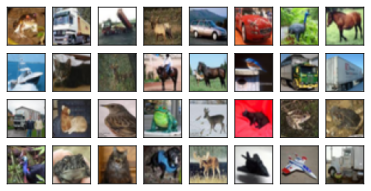

In [11]:
all_images = torchvision.datasets.CIFAR10(train=True, root="../data",
                                          download=True)
d2l.show_images([all_images[i][0] for i in range(32)], 4, 8, scale=0.8);

In order to obtain definitive results during prediction, we usually only apply image augmentation to training examples, and do not use image augmentation with random operations during prediction. 
[**Here we only use the simplest random left-right flipping method**]. In addition, we use a `ToTensor` instance to convert a minibatch of images into the format required by the deep learning framework, i.e., 
32-bit floating point numbers between 0 and 1 with the shape of (batch size, number of channels, height, width).


In [12]:
train_augs = torchvision.transforms.Compose([
     torchvision.transforms.RandomHorizontalFlip(),
     torchvision.transforms.ToTensor()])

test_augs = torchvision.transforms.Compose([
     torchvision.transforms.ToTensor()])

Next, we [**define an auxiliary function to facilitate reading the image and
applying image augmentation**]. 
The `transform` argument provided by PyTorch's
dataset applies augmentation to transform the images.
For
a detailed introduction to `DataLoader`, please refer to :numref:`sec_fashion_mnist`.


In [13]:
def load_cifar10(is_train, augs, batch_size):
    dataset = torchvision.datasets.CIFAR10(root="../data", train=is_train,
                                           transform=augs, download=True)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                    shuffle=is_train, num_workers=d2l.get_dataloader_workers())
    return dataloader

### Multi-GPU Training

We train the ResNet-18 model from
:numref:`sec_resnet` on the
CIFAR-10 dataset.
Recall the introduction to
multi-GPU training in :numref:`sec_multi_gpu_concise`.
In the following,
[**we define a function to train and evaluate the model using multiple GPUs**].


In [14]:
#@save
def train_batch_ch13(net, X, y, loss, trainer, devices):
    """Train for a minibatch with multiple GPUs (defined in Chapter 13)."""
    if isinstance(X, list):
        # Required for BERT fine-tuning (to be covered later)
        X = [x.to(devices[0]) for x in X]
    else:
        X = X.to(devices[0])
    y = y.to(devices[0])
    net.train()
    trainer.zero_grad()
    pred = net(X)
    l = loss(pred, y)
    l.sum().backward()
    trainer.step()
    train_loss_sum = l.sum()
    train_acc_sum = d2l.accuracy(pred, y)
    return train_loss_sum, train_acc_sum

In [15]:
#@save
def train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs,
               devices=d2l.try_all_gpus()):
    """Train a model with multiple GPUs (defined in Chapter 13)."""
    timer, num_batches = d2l.Timer(), len(train_iter)
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0, 1],
                            legend=['train loss', 'train acc', 'test acc'])
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples,
        # no. of predictions
        metric = d2l.Accumulator(4)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            l, acc = train_batch_ch13(
                net, features, labels, loss, trainer, devices)
            metric.add(l, acc, labels.shape[0], labels.numel())
            timer.stop()
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (metric[0] / metric[2], metric[1] / metric[3],
                              None))
        test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {metric[0] / metric[2]:.3f}, train acc '
          f'{metric[1] / metric[3]:.3f}, test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec on '
          f'{str(devices)}')

Now we can [**define the `train_with_data_aug` function to train the model with image augmentation**].
This function gets all available GPUs, 
uses Adam as the optimization algorithm,
applies image augmentation to the training dataset,
and finally calls the `train_ch13` function just defined to train and evaluate the model.


In [16]:
batch_size, devices, net = 256, d2l.try_all_gpus(), d2l.resnet18(10, 3)
net.apply(d2l.init_cnn)

def train_with_data_aug(train_augs, test_augs, net, lr=0.001):
    train_iter = load_cifar10(True, train_augs, batch_size)
    test_iter = load_cifar10(False, test_augs, batch_size)
    loss = nn.CrossEntropyLoss(reduction="none")
    trainer = torch.optim.Adam(net.parameters(), lr=lr)
    net(next(iter(train_iter))[0])
    train_ch13(net, train_iter, test_iter, loss, trainer, 10, devices)

Let's [**train the model**] using image augmentation based on random left-right flipping.


loss 0.231, train acc 0.921, test acc 0.836
4857.3 examples/sec on [device(type='cuda', index=0), device(type='cuda', index=1)]


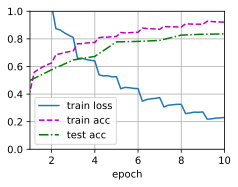

In [17]:
train_with_data_aug(train_augs, test_augs, net)

## Summary

* Image augmentation generates random images based on existing training data to improve the generalization ability of models.
* In order to obtain definitive results during prediction, we usually only apply image augmentation to training examples, and do not use image augmentation with random operations during prediction.
* Deep learning frameworks provide many different image augmentation methods, which can be applied simultaneously.


## Exercises

1. Train the model without using image augmentation: `train_with_data_aug(test_augs, test_augs)`. Compare training and testing accuracy when using and not using image augmentation. Can this comparative experiment support the argument that image augmentation can mitigate overfitting? Why?
1. Combine multiple different image augmentation methods in model training on the CIFAR-10 dataset. Does it improve test accuracy? 
1. Refer to the online documentation of the deep learning framework. What other image augmentation methods does it also provide?


[Discussions](https://discuss.d2l.ai/t/1404)
